# Setup

In [1]:
import lucene

try:
    print("Initializing VM")
    lucene.initVM(vmargs=['-Djava.awt.headless=true'])  # This needs to be run once to get it all going
except ValueError as e:
    print("VM already initialized")

Initializing VM


# First attempt
We started of by experimenting with a 250,000 game subset to see which approaches work and which don't.
The first thing we tried is the naïve approach of just using the example code of Lucene.

## Indexing

In [22]:
INDEX_DIR = "BaseLineModel.index"

import sys, os, lucene, threading, time
from datetime import datetime

from java.nio.file import Paths
from org.apache.lucene.analysis.miscellaneous import LimitTokenCountAnalyzer
from org.apache.lucene.analysis.standard import StandardAnalyzer
from org.apache.lucene.document import Document, Field, FieldType
from org.apache.lucene.index import \
    FieldInfo, IndexWriter, IndexWriterConfig, IndexOptions
from org.apache.lucene.store import NIOFSDirectory


class Ticker(object):

    def __init__(self):
        self.tick = True

    def run(self):
        while self.tick:
            sys.stdout.write('.')
            sys.stdout.flush()
            time.sleep(1.0)

class IndexFiles(object):
    """Usage: python IndexFiles <doc_directory>"""

    def __init__(self, root, storeDir, analyzer):
        if not os.path.exists(storeDir):
            os.mkdir(storeDir)

        store = NIOFSDirectory(Paths.get(storeDir))
        analyzer = LimitTokenCountAnalyzer(analyzer, 1048576)
        config = IndexWriterConfig(analyzer)
        config.setOpenMode(IndexWriterConfig.OpenMode.CREATE)
        writer = IndexWriter(store, config)

        self.indexDocs(root, writer)
        ticker = Ticker()
        print ('commit index'),
        threading.Thread(target=ticker.run).start()
        writer.commit()
        writer.close()
        ticker.tick = False
        print ('done')

    def indexDocs(self, root, writer):
        t1 = FieldType()
        t1.setStored(True)
        t1.setTokenized(False)
        t1.setIndexOptions(IndexOptions.DOCS_AND_FREQS)

        t2 = FieldType()
        t2.setStored(False)
        t2.setTokenized(True)
        t2.setIndexOptions(IndexOptions.DOCS_AND_FREQS_AND_POSITIONS)

        for root, dirnames, filenames in os.walk(root):
            for filename in filenames:
                if not filename.endswith('.txt'):
                    continue
                # print ("adding", filename)
                try:
                    path = os.path.join(root, filename)
                    file = open(path)
                    contents = str(file.read()) # , 'iso-8859-1')
                    file.close()
                    doc = Document()
                    doc.add(Field("name", filename, t1))
                    doc.add(Field("path", root, t1))
                    if len(contents) > 0:
                        doc.add(Field("contents", contents, t2))
                    else:
                        print ("warning: no content in %s" % filename)
                    writer.addDocument(doc)
                except Exception as e:
                    print ("Failed in indexDocs:", e)

start = datetime.now()
try:
    base_dir = "/Users/tobiaswilfert/Documents/University/IR/chess-db"
    IndexFiles("./good_games/", os.path.join(base_dir, INDEX_DIR),
                StandardAnalyzer())
    end = datetime.now()
    print (end - start)
except Exception as e:
    print ("Failed: ", e)
    raise e

commit index
...done
0:01:25.785354


## Querying

lucene 9.7.0
Searching for: PP3PPP
10 total matching documents.
Headers(Event='Rated Blitz game', Site='https://lichess.org/ohaXCm1Q', Date='2023.09.01', Round='-', White='sagnikroy692', Black='Karthikeyan_14092004', Result='1-0', UTCDate='2023.09.01', UTCTime='02:42:50', WhiteElo='1542', BlackElo='1560', WhiteRatingDiff='+6', BlackRatingDiff='-6', ECO='C01', Opening='French Defense: Exchange Variation, Monte Carlo Variation', TimeControl='180+2', Termination='Normal')
Position: https://lichess.org/ohaXCm1Q#8


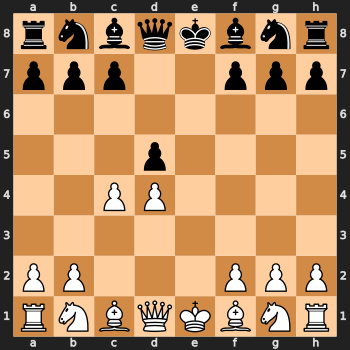

Headers(Event='Rated Blitz game', Site='https://lichess.org/h8g9cw49', Date='2023.09.01', Round='-', White='Trace95', Black='Wowa_04', Result='0-1', UTCDate='2023.09.01', UTCTime='01:30:46', WhiteElo='1521', BlackElo='1584', WhiteRatingDiff='-5', BlackRatingDiff='+5', ECO='D45', Opening='Semi-Slav Defense: Main Line', TimeControl='180+0', Termination='Normal')
Position: https://lichess.org/h8g9cw49#10


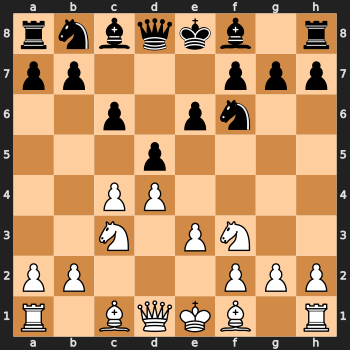

Headers(Event='Rated Rapid game', Site='https://lichess.org/rXcRecw9', Date='2023.09.01', Round='-', White='jughpaul', Black='lizard063', Result='0-1', UTCDate='2023.09.01', UTCTime='06:47:43', WhiteElo='1912', BlackElo='1880', WhiteRatingDiff='-7', BlackRatingDiff='+7', ECO='B22', Opening='Sicilian Defense: Smith-Morra Gambit Declined, Center Formation', TimeControl='600+0', Termination='Time forfeit')
Position: https://lichess.org/rXcRecw9#6


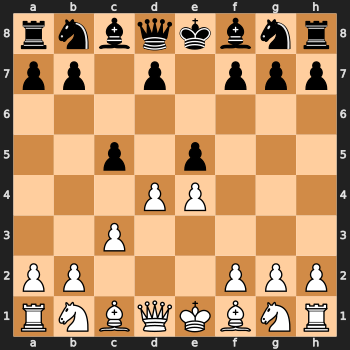

Headers(Event='Rated Blitz game', Site='https://lichess.org/CIPBUWai', Date='2023.09.01', Round='-', White='monchopena', Black='stariidrug', Result='1-0', UTCDate='2023.09.01', UTCTime='06:27:47', WhiteElo='1569', BlackElo='1569', WhiteRatingDiff='+6', BlackRatingDiff='-5', ECO='A40', Opening="Queen's Pawn Game", TimeControl='300+0', Termination='Normal')
Position: https://lichess.org/CIPBUWai#6


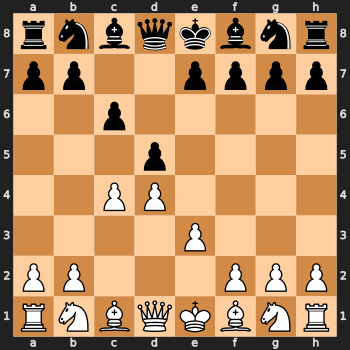

Headers(Event='Rated Blitz game', Site='https://lichess.org/DshJzFj3', Date='2023.09.01', Round='-', White='AlexApple', Black='abdulrahmanfares', Result='0-1', UTCDate='2023.09.01', UTCTime='07:04:49', WhiteElo='2079', BlackElo='2052', WhiteRatingDiff='-6', BlackRatingDiff='+6', ECO='C02', Opening='French Defense: Advance Variation, Milner-Barry Gambit', TimeControl='300+0', Termination='Time forfeit')
Position: https://lichess.org/DshJzFj3#8


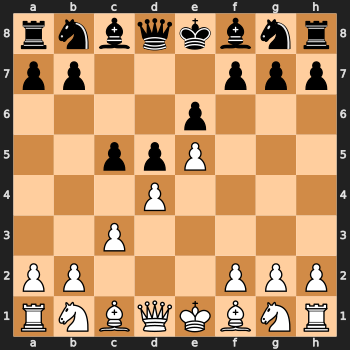

Headers(Event='Rated Blitz game', Site='https://lichess.org/WUJdabtw', Date='2023.09.01', Round='-', White='gerrbrx', Black='blindedpawn', Result='1-0', UTCDate='2023.09.01', UTCTime='06:53:23', WhiteElo='1616', BlackElo='1608', WhiteRatingDiff='+6', BlackRatingDiff='-6', ECO='B30', Opening='Sicilian Defense: Old Sicilian', TimeControl='300+0', Termination='Normal')
Position: https://lichess.org/WUJdabtw#12


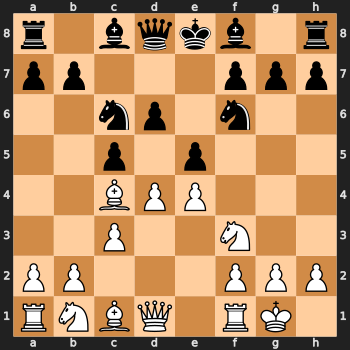

Headers(Event='Rated Blitz game', Site='https://lichess.org/yfgdMGBk', Date='2023.09.01', Round='-', White='zoli88', Black='anv90', Result='1-0', UTCDate='2023.09.01', UTCTime='07:00:19', WhiteElo='1854', BlackElo='1825', WhiteRatingDiff='+5', BlackRatingDiff='-5', ECO='B10', Opening='Caro-Kann Defense', TimeControl='180+0', Termination='Normal')
Position: https://lichess.org/yfgdMGBk#10


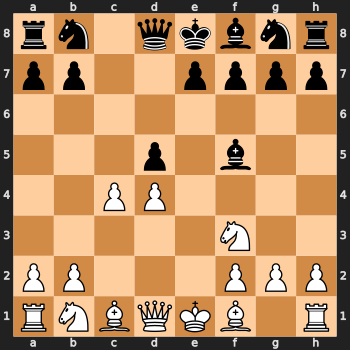

Headers(Event='Rated Blitz game', Site='https://lichess.org/G4UzUobT', Date='2023.09.01', Round='-', White='Tovarishch_Ecilop', Black='Boygwaps', Result='0-1', UTCDate='2023.09.01', UTCTime='05:35:54', WhiteElo='1861', BlackElo='1914', WhiteRatingDiff='-5', BlackRatingDiff='+4', ECO='E10', Opening='Tarrasch Defense: Symmetrical Variation', TimeControl='180+2', Termination='Normal')
Position: https://lichess.org/G4UzUobT#6


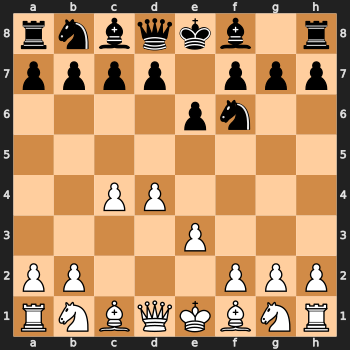

Headers(Event='Rated Bullet tournament https://lichess.org/tournament/ySfJqzmI', Site='https://lichess.org/ta6t9hDN', Date='2023.09.01', Round='-', White='RonaldoXadrez1234', Black='Jseguel', Result='1-0', UTCDate='2023.09.01', UTCTime='05:24:58', WhiteElo='2223', BlackElo='1675', WhiteRatingDiff='+2', BlackRatingDiff='+0', ECO='D00', Opening="Queen's Pawn Game", TimeControl='60+0', Termination='Time forfeit')
Position: https://lichess.org/ta6t9hDN#6


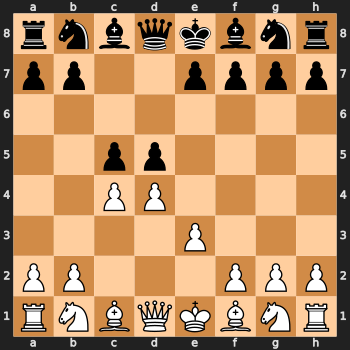

Headers(Event='Rated Blitz game', Site='https://lichess.org/SDItJowq', Date='2023.09.01', Round='-', White='nadinadinad', Black='nageshs01', Result='1-0', UTCDate='2023.09.01', UTCTime='06:04:19', WhiteElo='1602', BlackElo='1610', WhiteRatingDiff='+6', BlackRatingDiff='-8', ECO='A43', Opening='Benoni Defense: French Benoni', TimeControl='300+0', Termination='Normal')
Position: https://lichess.org/SDItJowq#10


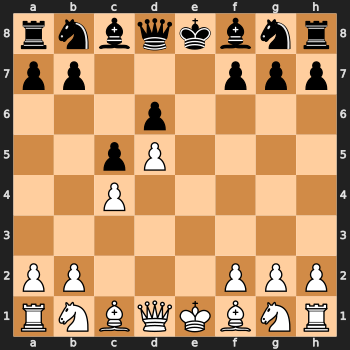

In [10]:
INDEX_DIR = "BaseLineModel.index"
import sys, os, lucene
import chess.svg

from java.nio.file import Paths
from org.apache.lucene.analysis.standard import StandardAnalyzer
from org.apache.lucene.index import DirectoryReader
from org.apache.lucene.queryparser.classic import QueryParser
from org.apache.lucene.store import NIOFSDirectory
from org.apache.lucene.search import IndexSearcher


def run(searcher, analyzer, command):
    print ("Searching for:", command)
    query = QueryParser("contents", analyzer).parse(command)
    scoreDocs = searcher.search(query, 10).scoreDocs
    print ("%s total matching documents." % len(scoreDocs))

    for scoreDoc in scoreDocs:
        doc = searcher.doc(scoreDoc.doc)
        path = os.path.join(doc.get("path"), doc.get("name"))
        file = open(path)
        content = str(file.read())
        file.close()
        i = 1
        for line in content.split("\n"):
            if i == 1:
                print(line)
            if command in line:
                print(f"Position: https://lichess.org/{doc.get('name').split('.')[0]}#{i}")
                # print ('path:', doc.get("path"), 'name:', doc.get("name"))
                board = chess.Board(line)
                display(chess.svg.board(board, size=350))
                break
            i += 1

print( 'lucene', lucene.VERSION)
base_dir = os.path.dirname("/Users/tobiaswilfert/Documents/University/IR/chess-db/test.ipynb")
directory = NIOFSDirectory(Paths.get(os.path.join(base_dir, INDEX_DIR)))
searcher = IndexSearcher(DirectoryReader.open(directory))
analyzer = StandardAnalyzer()
run(searcher, analyzer, command="PP3PPP")
del searcher


## Observations
We are able to query exact matches for board position rows in the database. This is due to the fact that FEN represents the board row wise and the standard analyzer seems to view each board-row in the FEN notation as a token. We visualized the matching board positions since it is easier to check these than the FEN representation. And indeed all the 10 matching board positions have a row (left to right) of 2 white pawns followed by 3 empty squares and then 3 white pawns.

It is also very interesting to note the different opening variations that can lead to such an open center for white, such as the Sicilian Defense, French Defense, Caro-Kann Defense, etc. This can be seen in the meta data of the games that contain the matching board positions.

## More complex sub-position
Let us try to query a more complex sub-position.

Searching for: 3p1q1n
10 total matching documents.
Headers(Event='Rated Blitz tournament https://lichess.org/tournament/iK7qzIYO', Site='https://lichess.org/hpNvmhN4', Date='2023.09.01', Round='-', White='SAIMON1975', Black='bestmovvea', Result='1-0', UTCDate='2023.09.01', UTCTime='03:08:17', WhiteElo='1861', BlackElo='1896', WhiteRatingDiff='+7', BlackRatingDiff='-7', ECO='D02', Opening="Queen's Pawn Game: Chigorin Variation", TimeControl='180+0', Termination='Normal')
Headers(Event='Rated Rapid game', Site='https://lichess.org/tINVJsuf', Date='2023.09.01', Round='-', White='calonjuarakampung', Black='olivares33', Result='0-1', UTCDate='2023.09.01', UTCTime='03:01:01', WhiteElo='1679', BlackElo='1664', WhiteRatingDiff='-6', BlackRatingDiff='+6', ECO='C41', Opening='Philidor Defense', TimeControl='600+0', Termination='Normal')
Position: https://lichess.org/tINVJsuf#31


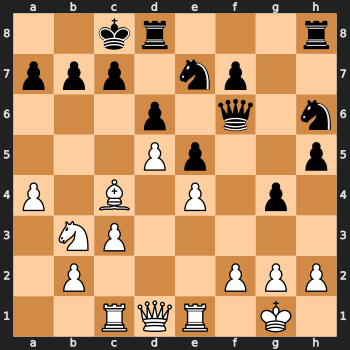

Headers(Event='Rated Bullet tournament https://lichess.org/tournament/uTI6tcfY', Site='https://lichess.org/at38O8ny', Date='2023.09.01', Round='-', White='Mohamedshamroukh', Black='zabiullah1', Result='0-1', UTCDate='2023.09.01', UTCTime='05:41:10', WhiteElo='1529', BlackElo='1955', WhiteRatingDiff='-1', BlackRatingDiff='+1', ECO='C44', Opening='Scotch Game: Scotch Gambit, Sarratt Variation', TimeControl='120+1', Termination='Normal')
Position: https://lichess.org/at38O8ny#17


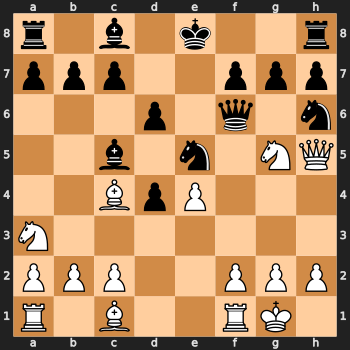

Headers(Event='Rated Blitz game', Site='https://lichess.org/8DsvNAUd', Date='2023.09.01', Round='-', White='darkhydro', Black='idodinio', Result='1-0', UTCDate='2023.09.01', UTCTime='07:05:18', WhiteElo='1781', BlackElo='1834', WhiteRatingDiff='+7', BlackRatingDiff='-7', ECO='C26', Opening='Vienna Game: Vienna Gambit', TimeControl='300+0', Termination='Time forfeit')
Position: https://lichess.org/8DsvNAUd#29


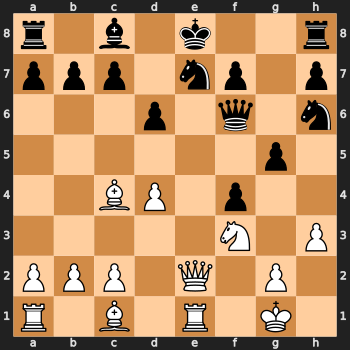

Headers(Event='Rated Blitz game', Site='https://lichess.org/K0pLy8pz', Date='2023.09.01', Round='-', White='rahil_2023', Black='robertkolmos', Result='1-0', UTCDate='2023.09.01', UTCTime='06:51:10', WhiteElo='1501', BlackElo='1523', WhiteRatingDiff='+13', BlackRatingDiff='-6', ECO='C23', Opening="Bishop's Opening", TimeControl='180+2', Termination='Normal')
Position: https://lichess.org/K0pLy8pz#15


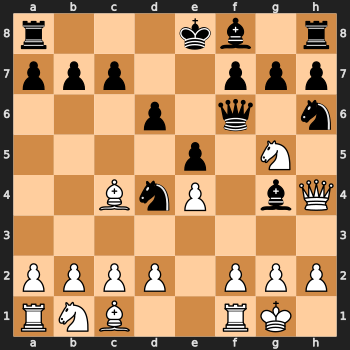

Headers(Event='Rated Rapid game', Site='https://lichess.org/epfx1INP', Date='2023.09.01', Round='-', White='robinYM', Black='FlorianRomero', Result='1-0', UTCDate='2023.09.01', UTCTime='01:53:21', WhiteElo='1703', BlackElo='1629', WhiteRatingDiff='+5', BlackRatingDiff='-7', ECO='B01', Opening='Scandinavian Defense', TimeControl='480+0', Termination='Normal')
Headers(Event='Rated Blitz game', Site='https://lichess.org/E5sRnHb1', Date='2023.09.01', Round='-', White='sanzanov', Black='SizzlingPawn', Result='1-0', UTCDate='2023.09.01', UTCTime='05:45:04', WhiteElo='1839', BlackElo='1855', WhiteRatingDiff='+6', BlackRatingDiff='-6', ECO='C44', Opening='Scotch Game: Vitzthum Attack', TimeControl='180+0', Termination='Normal')
Position: https://lichess.org/E5sRnHb1#19


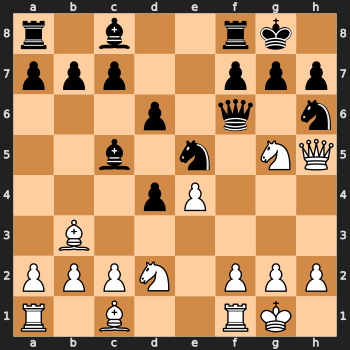

Headers(Event='Rated UltraBullet tournament https://lichess.org/tournament/17gucAvX', Site='https://lichess.org/0GUgInkp', Date='2023.09.01', Round='-', White='Vlad_Al', Black='TimoBjornson', Result='0-1', UTCDate='2023.09.01', UTCTime='05:39:07', WhiteElo='1722', BlackElo='1702', WhiteRatingDiff='-6', BlackRatingDiff='+6', ECO='C00', Opening='French Defense', TimeControl='15+0', Termination='Time forfeit')
Headers(Event='Rated Blitz tournament https://lichess.org/tournament/YLHfGCv9', Site='https://lichess.org/LHdA4sIV', Date='2023.09.01', Round='-', White='Noconx', Black='Tiriaomata', Result='0-1', UTCDate='2023.09.01', UTCTime='03:44:24', WhiteElo='1657', BlackElo='1526', WhiteRatingDiff='-10', BlackRatingDiff='+14', ECO='C41', Opening='Philidor Defense', TimeControl='180+0', Termination='Normal')
Position: https://lichess.org/LHdA4sIV#13


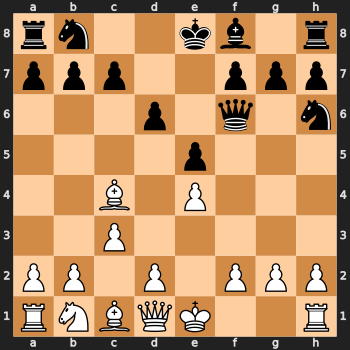

Headers(Event='Rated Blitz game', Site='https://lichess.org/UHREFJqO', Date='2023.09.01', Round='-', White='Hubird', Black='Spassky321', Result='0-1', UTCDate='2023.09.01', UTCTime='00:11:36', WhiteElo='1944', BlackElo='1911', WhiteRatingDiff='-6', BlackRatingDiff='+6', ECO='B07', Opening='Pirc Defense: Byrne Variation', TimeControl='180+0', Termination='Normal')
Position: https://lichess.org/UHREFJqO#39


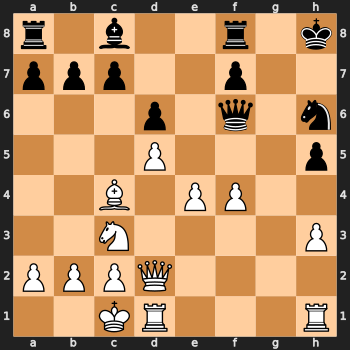

In [16]:
base_dir = os.path.dirname("/Users/tobiaswilfert/Documents/University/IR/chess-db/test.ipynb")
directory = NIOFSDirectory(Paths.get(os.path.join(base_dir, INDEX_DIR)))
searcher = IndexSearcher(DirectoryReader.open(directory))
analyzer = StandardAnalyzer()
run(searcher, analyzer, command="3p1q1n")
del searcher

## Conclusion
Again this looks very promising. We can again see that a surprising number of variations can lead to the position (row left to right) of 3 empty squares followed by a black pawn followed by an empty square followed by the black queen followed by an empty square followed by a black knight.

## Looking for full position
Let us now try to query for a full board position, that we know should be in the dataset.

In [20]:
base_dir = os.path.dirname("/Users/tobiaswilfert/Documents/University/IR/chess-db/test.ipynb")
directory = NIOFSDirectory(Paths.get(os.path.join(base_dir, INDEX_DIR)))
searcher = IndexSearcher(DirectoryReader.open(directory))
analyzer = StandardAnalyzer()
run(searcher, analyzer, command="rn2kb1r pp3ppp 3p1q1n 2pP4 2P5 2NQ1N2 PP3PPP R1B1K2R")
del searcher

Searching for: rn2kb1r pp3ppp 3p1q1n 2pP4 2P5 2NQ1N2 PP3PPP R1B1K2R
10 total matching documents.
Headers(Event='Rated Blitz game', Site='https://lichess.org/SDItJowq', Date='2023.09.01', Round='-', White='nadinadinad', Black='nageshs01', Result='1-0', UTCDate='2023.09.01', UTCTime='06:04:19', WhiteElo='1602', BlackElo='1610', WhiteRatingDiff='+6', BlackRatingDiff='-8', ECO='A43', Opening='Benoni Defense: French Benoni', TimeControl='300+0', Termination='Normal')
Headers(Event='Rated Blitz game', Site='https://lichess.org/9aLos4bu', Date='2023.09.01', Round='-', White='MangiPNG', Black='P1neha', Result='0-1', UTCDate='2023.09.01', UTCTime='04:54:41', WhiteElo='1696', BlackElo='1678', WhiteRatingDiff='-6', BlackRatingDiff='+6', ECO='B03', Opening='Alekhine Defense: Exchange Variation', TimeControl='180+0', Termination='Time forfeit')
Headers(Event='Rated Blitz game', Site='https://lichess.org/NHc61ksn', Date='2023.09.01', Round='-', White='SemSono', Black='alalalon', Result='1-0', UTCDat

## Troubleshooting
As can be observed looking up an entire position does not yield the desired result so let us fix the code to make it work.

lucene 9.7.0
Searching for: rn2kb1r pp3ppp 3p1q1n 2pP4 2P5 2NQ1N2 PP3PPP R1B1K2R
contents:rn2kb1r contents:pp3ppp contents:3p1q1n contents:2pp4 contents:2p5 contents:2nq1n2 contents:pp3ppp contents:r1b1k2r
10 total matching documents.
Headers(Event='Rated Blitz game', Site='https://lichess.org/SDItJowq', Date='2023.09.01', Round='-', White='nadinadinad', Black='nageshs01', Result='1-0', UTCDate='2023.09.01', UTCTime='06:04:19', WhiteElo='1602', BlackElo='1610', WhiteRatingDiff='+6', BlackRatingDiff='-8', ECO='A43', Opening='Benoni Defense: French Benoni', TimeControl='300+0', Termination='Normal')
Position: https://lichess.org/SDItJowq#18


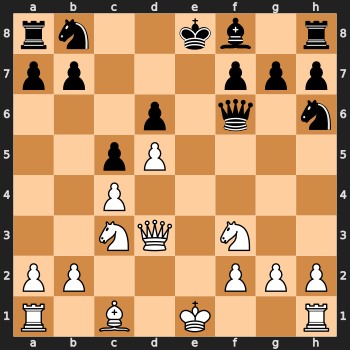

Headers(Event='Rated Blitz game', Site='https://lichess.org/9aLos4bu', Date='2023.09.01', Round='-', White='MangiPNG', Black='P1neha', Result='0-1', UTCDate='2023.09.01', UTCTime='04:54:41', WhiteElo='1696', BlackElo='1678', WhiteRatingDiff='-6', BlackRatingDiff='+6', ECO='B03', Opening='Alekhine Defense: Exchange Variation', TimeControl='180+0', Termination='Time forfeit')
Headers(Event='Rated Blitz game', Site='https://lichess.org/NHc61ksn', Date='2023.09.01', Round='-', White='SemSono', Black='alalalon', Result='1-0', UTCDate='2023.09.01', UTCTime='02:13:17', WhiteElo='1625', BlackElo='1626', WhiteRatingDiff='+6', BlackRatingDiff='-6', ECO='C20', Opening="King's Pawn Game: Macleod Attack", TimeControl='300+0', Termination='Normal')
Headers(Event='Rated Rapid game', Site='https://lichess.org/nFh3MOGi', Date='2023.09.01', Round='-', White='Carlos200119', Black='gso1mx', Result='1-0', UTCDate='2023.09.01', UTCTime='00:37:36', WhiteElo='1529', BlackElo='1514', WhiteRatingDiff='+26', Bla

In [28]:
INDEX_DIR = "BaseLineModel.index"
import sys, os, lucene
import chess.svg

from java.nio.file import Paths
from org.apache.lucene.analysis.standard import StandardAnalyzer
from org.apache.lucene.index import DirectoryReader
from org.apache.lucene.queryparser.classic import QueryParser
from org.apache.lucene.store import NIOFSDirectory
from org.apache.lucene.search import IndexSearcher


def run(searcher, analyzer, command):
    command  = command.replace("/", " ")
    print ("Searching for:", command)
    query = QueryParser("contents", analyzer).parse(command)
    print(query)
    scoreDocs = searcher.search(query, 10).scoreDocs
    print ("%s total matching documents." % len(scoreDocs))

    for scoreDoc in scoreDocs:
        doc = searcher.doc(scoreDoc.doc)
        path = os.path.join(doc.get("path"), doc.get("name"))
        file = open(path)
        content = str(file.read())
        file.close()
        i = 1
        for line in content.split("\n"):
            if i == 1:
                print(line)
            found_all = [(com in line) for com in command.split(" ") if com != ""]
            if all(found_all):
                print(f"Position: https://lichess.org/{doc.get('name').split('.')[0]}#{i}")
                # print ('path:', doc.get("path"), 'name:', doc.get("name"))
                board = chess.Board(line)
                display(chess.svg.board(board, size=350))
                break
            i += 1

print( 'lucene', lucene.VERSION)
base_dir = os.path.dirname("/Users/tobiaswilfert/Documents/University/IR/chess-db/test.ipynb")
directory = NIOFSDirectory(Paths.get(os.path.join(base_dir, INDEX_DIR)))
searcher = IndexSearcher(DirectoryReader.open(directory))
analyzer = StandardAnalyzer()
run(searcher, analyzer, command="rn2kb1r/pp3ppp/3p1q1n/2pP4/2P5/2NQ1N2/PP3PPP/R1B1K2R")
del searcher

While we found the position that we where locking for it also found games that don't seem have a game position that matches the position that was specified. So let us examine why these are being matched.

lucene 9.7.0
Searching for: rn2kb1r pp3ppp 3p1q1n 2pP4 2P5 2NQ1N2 PP3PPP R1B1K2R
contents:rn2kb1r contents:pp3ppp contents:3p1q1n contents:2pp4 contents:2p5 contents:2nq1n2 contents:pp3ppp contents:r1b1k2r
10 total matching documents.
Headers(Event='Rated Blitz game', Site='https://lichess.org/SDItJowq', Date='2023.09.01', Round='-', White='nadinadinad', Black='nageshs01', Result='1-0', UTCDate='2023.09.01', UTCTime='06:04:19', WhiteElo='1602', BlackElo='1610', WhiteRatingDiff='+6', BlackRatingDiff='-8', ECO='A43', Opening='Benoni Defense: French Benoni', TimeControl='300+0', Termination='Normal')
[False, False, False, True, False, False, False, False]
Position: https://lichess.org/SDItJowq#6


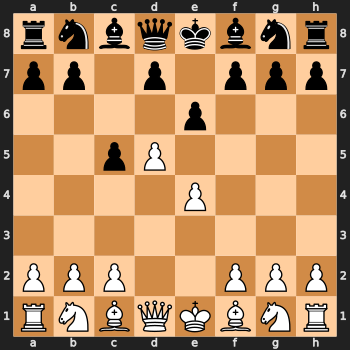

Headers(Event='Rated Blitz game', Site='https://lichess.org/9aLos4bu', Date='2023.09.01', Round='-', White='MangiPNG', Black='P1neha', Result='0-1', UTCDate='2023.09.01', UTCTime='04:54:41', WhiteElo='1696', BlackElo='1678', WhiteRatingDiff='-6', BlackRatingDiff='+6', ECO='B03', Opening='Alekhine Defense: Exchange Variation', TimeControl='180+0', Termination='Time forfeit')
[False, False, False, False, True, False, False, False]
Position: https://lichess.org/9aLos4bu#6


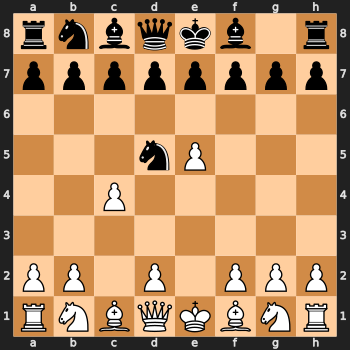

Headers(Event='Rated Blitz game', Site='https://lichess.org/NHc61ksn', Date='2023.09.01', Round='-', White='SemSono', Black='alalalon', Result='1-0', UTCDate='2023.09.01', UTCTime='02:13:17', WhiteElo='1625', BlackElo='1626', WhiteRatingDiff='+6', BlackRatingDiff='-6', ECO='C20', Opening="King's Pawn Game: Macleod Attack", TimeControl='300+0', Termination='Normal')
[False, False, False, False, True, False, False, False]
Position: https://lichess.org/NHc61ksn#4


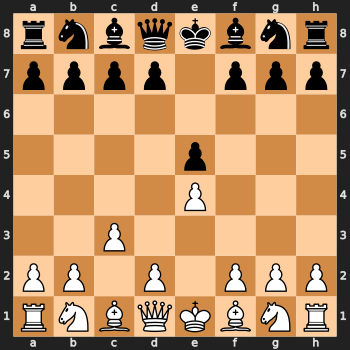

Headers(Event='Rated Rapid game', Site='https://lichess.org/nFh3MOGi', Date='2023.09.01', Round='-', White='Carlos200119', Black='gso1mx', Result='1-0', UTCDate='2023.09.01', UTCTime='00:37:36', WhiteElo='1529', BlackElo='1514', WhiteRatingDiff='+26', BlackRatingDiff='-5', ECO='B00', Opening='Duras Gambit', TimeControl='600+0', Termination='Normal')
[False, False, False, False, False, False, True, False]
Position: https://lichess.org/nFh3MOGi#8


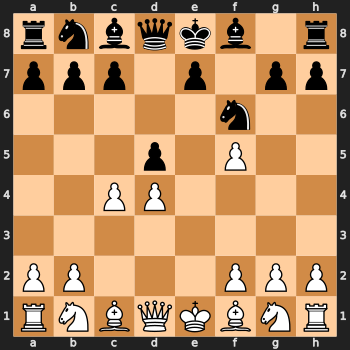

Headers(Event='Rated Blitz tournament https://lichess.org/tournament/YLHfGCv9', Site='https://lichess.org/LHdA4sIV', Date='2023.09.01', Round='-', White='Noconx', Black='Tiriaomata', Result='0-1', UTCDate='2023.09.01', UTCTime='03:44:24', WhiteElo='1657', BlackElo='1526', WhiteRatingDiff='-10', BlackRatingDiff='+14', ECO='C41', Opening='Philidor Defense', TimeControl='180+0', Termination='Normal')
[False, False, False, False, True, False, False, False]
Position: https://lichess.org/LHdA4sIV#12


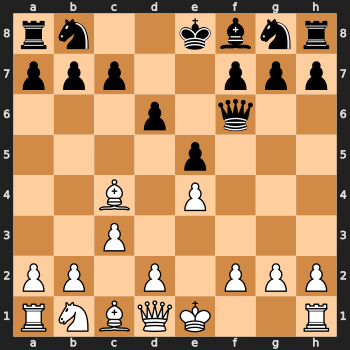

Headers(Event='Rated Rapid game', Site='https://lichess.org/AHZcutbD', Date='2023.09.01', Round='-', White='Esatbb', Black='Sergei_Kasakov', Result='1-0', UTCDate='2023.09.01', UTCTime='06:44:26', WhiteElo='1684', BlackElo='1675', WhiteRatingDiff='+12', BlackRatingDiff='-7', ECO='B22', Opening='Sicilian Defense: Alapin Variation', TimeControl='600+0', Termination='Normal')
[False, False, False, False, True, False, False, False]
Position: https://lichess.org/AHZcutbD#4


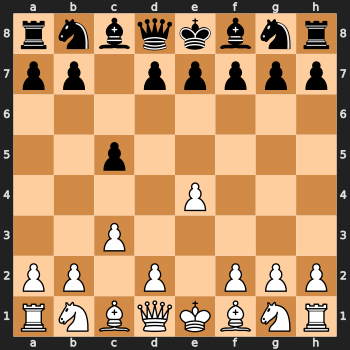

Headers(Event='Rated Blitz tournament https://lichess.org/tournament/bD3s3o25', Site='https://lichess.org/9sjGFLWq', Date='2023.09.01', Round='-', White='RMJ55', Black='AzadGuseynov', Result='1-0', UTCDate='2023.09.01', UTCTime='01:47:49', WhiteElo='1881', BlackElo='1589', WhiteRatingDiff='+1', BlackRatingDiff='-2', ECO='D12', Opening='Slav Defense: Quiet Variation, Schallopp Defense', TimeControl='180+2', Termination='Normal')
[False, False, False, False, False, False, True, False]
Position: https://lichess.org/9sjGFLWq#6


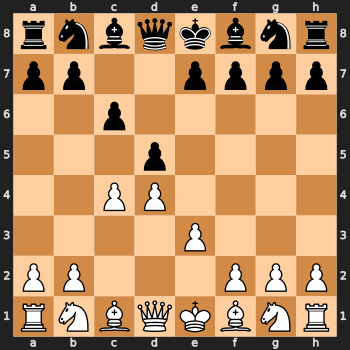

Headers(Event='Rated Blitz tournament https://lichess.org/tournament/bF1VFnjF', Site='https://lichess.org/k4jVtJwh', Date='2023.09.01', Round='-', White='Autoridad', Black='GabrielHuang24', Result='1-0', UTCDate='2023.09.01', UTCTime='04:00:05', WhiteElo='2149', BlackElo='1616', WhiteRatingDiff='+1', BlackRatingDiff='-1', ECO='C41', Opening='Philidor Defense', TimeControl='180+2', Termination='Normal')
[True, False, True, False, False, False, False, False]
Position: https://lichess.org/k4jVtJwh#13


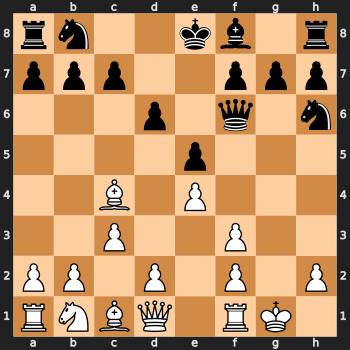

Headers(Event='Rated Blitz game', Site='https://lichess.org/FH7xTQrX', Date='2023.09.01', Round='-', White='intplayerstart3', Black='llamasmex', Result='0-1', UTCDate='2023.09.01', UTCTime='01:34:15', WhiteElo='1888', BlackElo='1938', WhiteRatingDiff='-5', BlackRatingDiff='+5', ECO='D00', Opening="Queen's Pawn Game: Mason Variation", TimeControl='180+0', Termination='Time forfeit')
[False, True, False, False, False, False, False, False]
Position: https://lichess.org/FH7xTQrX#7


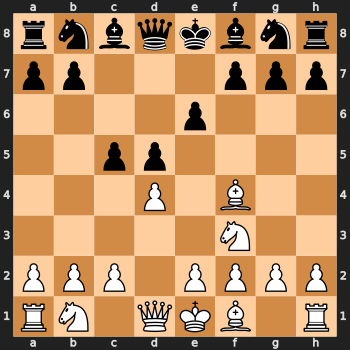

Headers(Event='Rated Blitz game', Site='https://lichess.org/o020cUia', Date='2023.09.01', Round='-', White='sekarvr', Black='EuanC', Result='0-1', UTCDate='2023.09.01', UTCTime='02:55:53', WhiteElo='1519', BlackElo='1508', WhiteRatingDiff='-6', BlackRatingDiff='+11', ECO='B20', Opening='Sicilian Defense: Bowdler Attack', TimeControl='300+0', Termination='Normal')
[False, True, False, False, False, False, False, False]
Position: https://lichess.org/o020cUia#11


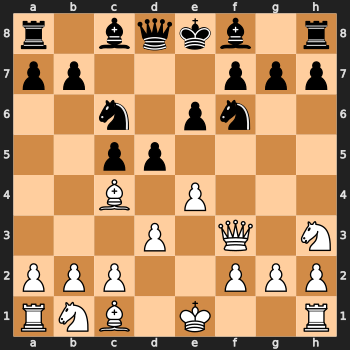

In [29]:
INDEX_DIR = "BaseLineModel.index"
import sys, os, lucene
import chess.svg

from java.nio.file import Paths
from org.apache.lucene.analysis.standard import StandardAnalyzer
from org.apache.lucene.index import DirectoryReader
from org.apache.lucene.queryparser.classic import QueryParser
from org.apache.lucene.store import NIOFSDirectory
from org.apache.lucene.search import IndexSearcher


def run(searcher, analyzer, command):
    command  = command.replace("/", " ")
    print ("Searching for:", command)
    query = QueryParser("contents", analyzer).parse(command)
    print(query)
    scoreDocs = searcher.search(query, 10).scoreDocs
    print ("%s total matching documents." % len(scoreDocs))

    for scoreDoc in scoreDocs:
        doc = searcher.doc(scoreDoc.doc)
        path = os.path.join(doc.get("path"), doc.get("name"))
        file = open(path)
        content = str(file.read())
        file.close()
        i = 1
        for line in content.split("\n"):
            if i == 1:
                print(line)
            found_all = [(com in line) for com in command.split(" ") if com != ""]
            if any(found_all):
                print(found_all)
                print(f"Position: https://lichess.org/{doc.get('name').split('.')[0]}#{i}")
                # print ('path:', doc.get("path"), 'name:', doc.get("name"))
                board = chess.Board(line)
                display(chess.svg.board(board, size=350))
                break
            i += 1

print( 'lucene', lucene.VERSION)
base_dir = os.path.dirname("/Users/tobiaswilfert/Documents/University/IR/chess-db/test.ipynb")
directory = NIOFSDirectory(Paths.get(os.path.join(base_dir, INDEX_DIR)))
searcher = IndexSearcher(DirectoryReader.open(directory))
analyzer = StandardAnalyzer()
run(searcher, analyzer, command="rn2kb1r/pp3ppp/3p1q1n/2pP4/2P5/2NQ1N2/PP3PPP/R1B1K2R")
del searcher

## Conclusion
As we can see the issue arises since the rows of the board are matched partially but not completely. This is due to the fact that the standard analyzer tokenizes the FEN notation by treating each board-row as a single token. This is of course not good since we want to match the entire board position and not just a part of it. So let us try to fix this with boolean search.

## Doing boolean search

+contents:r1bqkb1r +contents:pp3ppp +contents:2n1pn2 +contents:2pp4 +contents:2b5 +contents:3p1q1n +contents:ppp2ppp +contents:rnb1k2r
1 total matching documents.
Headers(Event='Rated Blitz game', Site='https://lichess.org/o020cUia', Date='2023.09.01', Round='-', White='sekarvr', Black='EuanC', Result='0-1', UTCDate='2023.09.01', UTCTime='02:55:53', WhiteElo='1519', BlackElo='1508', WhiteRatingDiff='-6', BlackRatingDiff='+11', ECO='B20', Opening='Sicilian Defense: Bowdler Attack', TimeControl='300+0', Termination='Normal')
r1bqkb1r/pp3ppp/2n1pn2/2pP4/2B5/3P1Q1N/PPP2PPP/RNB1K2R b KQkq - 0 6
[True]
Position: https://lichess.org/o020cUia#12


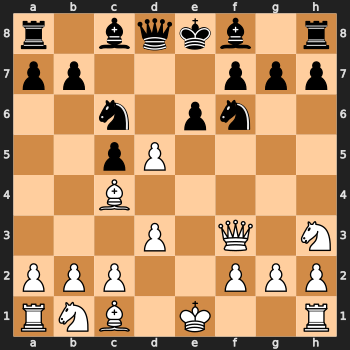

In [88]:
INDEX_DIR = "BaseLineModel.index"

# TODO: This is matching nothing.

from org.apache.lucene.search import BooleanQuery, BooleanClause, TermQuery
from org.apache.lucene.index import Term
from org.apache.lucene.queryparser.classic import QueryParser
from org.apache.lucene.analysis.standard import StandardAnalyzer
# from org.apache.lucene.store import SimpleFSDirectory
from org.apache.lucene.util import Version
from java.io import File

# Initialize the analyzer and searcher
directory = NIOFSDirectory(Paths.get(os.path.join(base_dir, INDEX_DIR)))
analyzer = StandardAnalyzer()
searcher = IndexSearcher(DirectoryReader.open(directory))

# Create a BooleanQuery
boolean_query = BooleanQuery.Builder()
query = "r1bqkb1r/pp3ppp/2n1pn2/2pP4/2B5/3P1Q1N/PPP2PPP/RNB1K2R".lower()

#query = "Header"

# Split the query into keywords
keywords = query.split('/')
#keywords = ["rn2kb1r", "pp3ppp", "3p1q1n", "2pP4", "2P5", "2NQ1N2", "PP3PPP", "R1B1K2R"] 

# For each keyword, create a TermQuery and add it to the BooleanQuery
for keyword in keywords:
    term = Term("contents", keyword)  # replace "fieldname" with the name of your field
    term_query = TermQuery(term)
    boolean_query.add(term_query, BooleanClause.Occur.MUST)

print(boolean_query.build())

# Search with the BooleanQuery
scoreDocs = searcher.search(boolean_query.build(), 10).scoreDocs

print ("%s total matching documents." % len(scoreDocs))

for scoreDoc in scoreDocs:
    doc = searcher.doc(scoreDoc.doc)
    path = os.path.join(doc.get("path"), doc.get("name"))
    file = open(path)
    content = str(file.read())
    file.close()
    i = 1
    for line in content.split("\n"):
        found_all = [(com in line.lower()) for com in query.split(" ") if com != ""]
        if i == 1:
            print(line)
        elif any(found_all):
            print(line)
            print(found_all)
            print(f"Position: https://lichess.org/{doc.get('name').split('.')[0]}#{i}")
            # print ('path:', doc.get("path"), 'name:', doc.get("name"))
            board = chess.Board(line)
            display(chess.svg.board(board, size=350))
            break
        i += 1

## Conclusion
While this seems to work at first glance it is not a good solution since the tokenizer makes all the tokens lowercase. This is a problem since the FEN notation is case sensitive, to indicate the color of the pieces, so we need to fix this somehow. 

## Keyword Analyzer (Hopefully case sensitive)
After looking at the Lucene documentation we found the keyword analyzer which should hopefully be case sensitive so let us try that.

In [91]:
INDEX_DIR = "KeyWordModel.index"

import sys, os, lucene, threading, time
from datetime import datetime

from java.nio.file import Paths
from org.apache.lucene.analysis.miscellaneous import LimitTokenCountAnalyzer
from org.apache.lucene.analysis.standard import StandardAnalyzer
from org.apache.lucene.document import Document, Field, FieldType
from org.apache.lucene.index import \
    FieldInfo, IndexWriter, IndexWriterConfig, IndexOptions
from org.apache.lucene.store import NIOFSDirectory
from org.apache.lucene.analysis.core import KeywordAnalyzer


class Ticker(object):

    def __init__(self):
        self.tick = True

    def run(self):
        while self.tick:
            sys.stdout.write('.')
            sys.stdout.flush()
            time.sleep(1.0)

class IndexFiles(object):
    """Usage: python IndexFiles <doc_directory>"""

    def __init__(self, root, storeDir, analyzer):
        if not os.path.exists(storeDir):
            os.mkdir(storeDir)

        store = NIOFSDirectory(Paths.get(storeDir))
        analyzer = LimitTokenCountAnalyzer(analyzer, 1048576)
        config = IndexWriterConfig(analyzer)
        config.setOpenMode(IndexWriterConfig.OpenMode.CREATE)
        writer = IndexWriter(store, config)

        self.indexDocs(root, writer)
        ticker = Ticker()
        print ('commit index'),
        threading.Thread(target=ticker.run).start()
        writer.commit()
        writer.close()
        ticker.tick = False
        print ('done')

    def indexDocs(self, root, writer):
        t1 = FieldType()
        t1.setStored(True)
        t1.setTokenized(False)
        t1.setIndexOptions(IndexOptions.DOCS_AND_FREQS)

        t2 = FieldType()
        t2.setStored(False)
        t2.setTokenized(True)
        t2.setIndexOptions(IndexOptions.DOCS_AND_FREQS_AND_POSITIONS)

        for root, dirnames, filenames in os.walk(root):
            for filename in filenames:
                if not filename.endswith('.txt'):
                    continue
                # print ("adding", filename)
                try:
                    path = os.path.join(root, filename)
                    file = open(path)
                    contents = str(file.read()) # , 'iso-8859-1')
                    file.close()
                    doc = Document()
                    doc.add(Field("name", filename, t1))
                    doc.add(Field("path", root, t1))
                    if len(contents) > 0:
                        doc.add(Field("contents", contents, t2))
                    else:
                        print ("warning: no content in %s" % filename)
                    writer.addDocument(doc)
                except Exception as e:
                    print ("Failed in indexDocs:", e)

start = datetime.now()
try:
    base_dir = "/Users/tobiaswilfert/Documents/University/IR/chess-db"
    IndexFiles("./good_games/", os.path.join(base_dir, INDEX_DIR),
                KeywordAnalyzer())
    end = datetime.now()
    print (end - start)
except Exception as e:
    print ("Failed: ", e)
    raise e

commit index
...done
0:01:01.593464


In [94]:
INDEX_DIR = "KeyWordModel.index"

from org.apache.lucene.search import BooleanQuery, BooleanClause, TermQuery
from org.apache.lucene.index import Term
from org.apache.lucene.queryparser.classic import QueryParser
from org.apache.lucene.analysis.standard import StandardAnalyzer
from org.apache.lucene.analysis.core import KeywordAnalyzer

# from org.apache.lucene.store import SimpleFSDirectory
from org.apache.lucene.util import Version
from java.io import File

# Initialize the analyzer and searcher
directory = NIOFSDirectory(Paths.get(os.path.join(base_dir, INDEX_DIR)))
analyzer = KeywordAnalyzer()
searcher = IndexSearcher(DirectoryReader.open(directory))

# Create a BooleanQuery
boolean_query = BooleanQuery.Builder()
query = "r1bqkb1r/pp3ppp/2n1pn2/2pP4/2B5/3P1Q1N/PPP2PPP/RNB1K2R" # .lower()

# Split the query into keywords
keywords = query.split('/')

# For each keyword, create a TermQuery and add it to the BooleanQuery
for keyword in keywords:
    term = Term("contents", keyword)  # replace "fieldname" with the name of your field
    term_query = TermQuery(term)
    boolean_query.add(term_query, BooleanClause.Occur.MUST)

print(boolean_query.build())

# Search with the BooleanQuery
scoreDocs = searcher.search(boolean_query.build(), 10).scoreDocs

print ("%s total matching documents." % len(scoreDocs))

for scoreDoc in scoreDocs:
    doc = searcher.doc(scoreDoc.doc)
    path = os.path.join(doc.get("path"), doc.get("name"))
    file = open(path)
    content = str(file.read())
    file.close()
    i = 1
    for line in content.split("\n"):
        found_all = [(com in line.lower()) for com in query.split(" ") if com != ""]
        if i == 1:
            print(line)
        elif any(found_all):
            print(line)
            print(found_all)
            print(f"Position: https://lichess.org/{doc.get('name').split('.')[0]}#{i}")
            # print ('path:', doc.get("path"), 'name:', doc.get("name"))
            board = chess.Board(line)
            display(chess.svg.board(board, size=350))
            break
        i += 1

+contents:r1bqkb1r +contents:pp3ppp +contents:2n1pn2 +contents:2pP4 +contents:2B5 +contents:3P1Q1N +contents:PPP2PPP +contents:RNB1K2R
0 total matching documents.


Not working.

In [99]:
INDEX_DIR = "KeyWordModel.index"

def run(searcher, analyzer, command):
    command  = command.replace("/", " ")
    print ("Searching for:", command)
    query = QueryParser("contents", analyzer).parse(command)
    print(query)
    scoreDocs = searcher.search(query, 10).scoreDocs
    print ("%s total matching documents." % len(scoreDocs))

    for scoreDoc in scoreDocs:
        doc = searcher.doc(scoreDoc.doc)
        path = os.path.join(doc.get("path"), doc.get("name"))
        file = open(path)
        content = str(file.read())
        file.close()
        i = 1
        for line in content.split("\n"):
            if i == 1:
                print(line)
            found_all = [(com in line) for com in command.split(" ") if com != ""]
            if any(found_all):
                print(found_all)
                print(f"Position: https://lichess.org/{doc.get('name').split('.')[0]}#{i}")
                # print ('path:', doc.get("path"), 'name:', doc.get("name"))
                board = chess.Board(line)
                display(chess.svg.board(board, size=350))
                break
            i += 1

print( 'lucene', lucene.VERSION)
base_dir = os.path.dirname("/Users/tobiaswilfert/Documents/University/IR/chess-db/test.ipynb")
directory = NIOFSDirectory(Paths.get(os.path.join(base_dir, INDEX_DIR)))
searcher = IndexSearcher(DirectoryReader.open(directory))
analyzer = KeywordAnalyzer()
run(searcher, analyzer, command="rn2kb1r")
del searcher

lucene 9.7.0
Searching for: rn2kb1r
contents:rn2kb1r
0 total matching documents.


Still not working :(

## Decent into madness
Upon not getting the expected results for the analyzer we started to do some more exploration just to see where the problem lies.

In [ ]:
# TODO: Need a case sensitive analyser.
# TODO: Want to do some wilcard queries just to see if it is working

from org.apache.lucene.search import WildcardQuery
from org.apache.lucene.index import Term

# Create a wildcard query
term = Term("contents", "r1bqkb1r*")  # replace "contents" with the name of your field
wildcard_query = WildcardQuery(term)

# Search with the wildcard query
scoreDocs = searcher.search(wildcard_query, 10).scoreDocs

In [8]:
# from lucene import TokenStream, StringReader, Version

# from java.nio.file import Paths
# from org.apache.lucene.analysis.miscellaneous import LimitTokenCountAnalyzer
# from org.apache.lucene.analysis.standard import StandardAnalyzer
# from org.apache.lucene.document import Document, Field, FieldType
# from org.apache.lucene.index import \
#     FieldInfo, IndexWriter, IndexWriterConfig, IndexOptions
# from org.apache.lucene.store import NIOFSDirectory
# from org.apache.lucene.analysis.core import KeywordAnalyzer

# class CaseSensitiveLineTokenizer(TokenStream):
#     def __init__(self, input_stream):
#         super().__init__()

#         # Use StandardTokenizer for tokenization
#         self.tokenizer = KeywordAnalyzer(Version.LATEST, input_stream)
#         self.term_attribute = self.addAttribute(String)
#         self.offset_attribute = self.addAttribute(int)

#     def incrementToken(self):
#         # Clear attributes
#         self.clearAttributes()

#         # Read a line from the input
#         buffer = []
#         ch = self.tokenizer.incrementToken()
#         while ch:
#             buffer.append(self.term_attribute)
#             ch = self.tokenizer.incrementToken()

#         # If there are characters in the buffer, set them as the term attribute
#         if buffer:
#             self.term_attribute.copyBuffer(buffer, 0, len(buffer))
#             self.offset_attribute = (0, len(buffer))
#             return True
#         else:
#             return False

# # Example usage
# document = "This is the first line.\nThis is the second line."

# # Create an instance of the custom tokenizer
# tokenizer = CaseSensitiveLineTokenizer(StandardAnalyzer().tokenStream("content", StringReader(document)))

# # Tokenize the document
# while tokenizer.incrementToken():
#     # Access the token
#     print(tokenizer.term_attribute.toString())


ImportError: cannot import name 'TokenStream' from 'lucene' (/Users/tobiaswilfert/Documents/University/IR/chess-db/.venv/lib/python3.11/site-packages/lucene-9.7.0-py3.11-macosx-13-x86_64.egg/lucene/__init__.py)

In [9]:
from org.apache.lucene.analysis import Analyzer
from org.apache.lucene.analysis.core import WhitespaceTokenizer
from org.apache.lucene.analysis.tokenattributes import CharTermAttribute
from org.apache.lucene.util import AttributeFactory

class LineTokenizer(WhitespaceTokenizer):
    def __init__(self, factory, in_):
        super(LineTokenizer, self).__init__(factory, in_)
        self.termAtt = self.addAttribute(CharTermAttribute.class_)

    def isTokenChar(self, c):
        return c != '\n'

class LineAnalyzer(Analyzer):
    def createComponents(self, fieldName):
        factory = AttributeFactory.DEFAULT_ATTRIBUTE_FACTORY
        tokenizer = LineTokenizer(factory, self.reader)
        return Analyzer.TokenStreamComponents(tokenizer)

# Initialize the analyzer
analyzer = LineAnalyzer()

# Create a sample document
document = "This is the first line.\nThis is the second line.\nAnd this is the third line."

# Tokenize the document using the LineAnalyzer
token_stream = analyzer.tokenStream("content", document)

# Iterate over the tokens and print them
token_stream.reset()
while token_stream.incrementToken():
    token = token_stream.getAttribute(CharTermAttribute.class_)
    print(token)


NotImplementedError: ('instantiating java class', <class '__main__.LineAnalyzer'>)

In [17]:
from org.apache.lucene.analysis.core import KeywordAnalyzer
from org.apache.lucene.analysis import TokenFilter

class CustomAnalyzer(KeywordAnalyzer):
    def createComponents(self, fieldName):
        source = KeywordAnalyzer.createComponents(self, fieldName).getSink()
        filter = CustomTokenFilter(source)  # replace with your custom TokenFilter
        return (source, filter)

# Initialize the analyzer
analyzer = CustomAnalyzer()

# Example usage
text = "This is the first line.\nThis is the second line.\nAnd this is the third line."

# Tokenize the text using the CustomAnalyzer
token_stream = analyzer.tokenStream("content", text)

# Iterate over the tokens and print them
token_stream.reset()
while token_stream.incrementToken():
    token = token_stream.getAttribute(CharTermAttribute.class_)
    print(token)


This is the first line.
This is the second line.
And this is the third line.


Splitting on lines this is potentially very interesting.

In [29]:
# TODO: This is not working like it should.


from org.apache.lucene.analysis import Analyzer
from org.apache.lucene.analysis.core import WhitespaceTokenizer
# from org.apache.lucene.analysis.util import CharArraySet
from java.io import StringReader
import lucene
from org.apache.lucene.util import Version

class LineTokenizer(WhitespaceTokenizer):
    def __init__(self, matchVersion, in_, maxTokenLen):
        super(LineTokenizer, self).__init__(matchVersion, in_, maxTokenLen)

    def isTokenChar(self, c):
        return c != '\n'

class LineAnalyzer(Analyzer):
    def __init__(self, matchVersion):
        # super(LineAnalyzer, self).__init__(matchVersion)
        self.matchVersion = matchVersion

    def createComponents(self, fieldName, reader):
        source = LineTokenizer(self.matchVersion, reader, 255)
        return Analyzer.TokenStreamComponents(source)

# Initialize the analyzer
analyzer = LineAnalyzer(lucene.VERSION)

# Sample document
document = "This is the first line.\nThis is the second line.\nAnd this is the third line."

# Tokenize the document using the LineAnalyzer
token_stream = analyzer.tokenStream("content", document)

# Iterate over the tokens and print them
token_stream.reset()
while token_stream.incrementToken():
    token = token_stream.getAttribute(CharTermAttribute.class_)
    print(token)


JavaError: <super: <class 'JavaError'>, <JavaError object>>
    Java stacktrace:
java.lang.NullPointerException


In [18]:
from org.apache.lucene.analysis import Analyzer
from org.apache.lucene.analysis.core import WhitespaceTokenizer
from org.apache.lucene.analysis import ReusableAnalyzerBase
# from org.apache.lucene.analysis.util import CharArraySet
# from java.io import StringReader
# from lucene import ReusableAnalyzerBase

class LineTokenizer(WhitespaceTokenizer):
    def __init__(self, matchVersion, in_, maxTokenLe):
        super(LineTokenizer, self).__init__(matchVersion, in_, maxTokenLen)
        super(LineTokenizer, self).__init__()

    def isTokenChar(self, c):
        return c != '\n'

class LineAnalyzer(ReusableAnalyzerBase):
    def __init__(self, matchVersion):
        super(LineAnalyzer, self).__init__()
        self.matchVersion = matchVersion

    def createComponents(self, fieldName, reader):
        source = LineTokenizer(self.matchVersion, reader, 255)
        return ReusableAnalyzerBase.TokenStreamComponents(source)

ImportError: cannot import name 'ReusableAnalyzerBase' from 'org.apache.lucene.analysis' (/Users/tobiaswilfert/Documents/University/IR/chess-db/.venv/lib/python3.11/site-packages/lucene-9.7.0-py3.11-macosx-13-x86_64.egg/lucene/_lucene.cpython-311-darwin.so)

In [19]:
from org.apache.lucene.analysis import AnalyzerWrapper, Analyzer
from org.apache.lucene.analysis.core import WhitespaceTokenizer
from java.io import StringReader

class LineTokenizer(WhitespaceTokenizer):
    def __init__(self, matchVersion, in_, maxTokenLen):
        super(LineTokenizer, self).__init__(matchVersion, in_, maxTokenLen)

    def isTokenChar(self, c):
        return c != '\n'

class LineAnalyzer(AnalyzerWrapper):
    def __init__(self, matchVersion):
        super(LineAnalyzer, self).__init__(Analyzer.PER_FIELD_REUSE_STRATEGY)
        self.matchVersion = matchVersion

    def getWrappedAnalyzer(self, fieldName):
        return Analyzer() 

    def createComponents(self, fieldName, reader):
        source = LineTokenizer(self.matchVersion, reader, 255)
        return Analyzer.TokenStreamComponents(source)

## White space analyzer
After the a bit of experimentation we found that the whitespace analyzer could be just what we need so let us give it a try.

In [64]:
INDEX_DIR = "WhiteSpaceModel3.index"

import sys, os, lucene, threading, time
from datetime import datetime

from java.nio.file import Paths
from org.apache.lucene.analysis.miscellaneous import LimitTokenCountAnalyzer
from org.apache.lucene.analysis.standard import StandardAnalyzer
from org.apache.lucene.document import Document, Field, FieldType
from org.apache.lucene.index import \
    FieldInfo, IndexWriter, IndexWriterConfig, IndexOptions
from org.apache.lucene.store import NIOFSDirectory
from org.apache.lucene.analysis.core import WhitespaceAnalyzer


class Ticker(object):

    def __init__(self):
        self.tick = True

    def run(self):
        while self.tick:
            sys.stdout.write('.')
            sys.stdout.flush()
            time.sleep(1.0)

class IndexFiles(object):
    """Usage: python IndexFiles <doc_directory>"""

    def __init__(self, root, storeDir, analyzer):
        if not os.path.exists(storeDir):
            os.mkdir(storeDir)

        store = NIOFSDirectory(Paths.get(storeDir))
        analyzer = LimitTokenCountAnalyzer(analyzer, 1048576)
        config = IndexWriterConfig(analyzer)
        config.setOpenMode(IndexWriterConfig.OpenMode.CREATE)
        writer = IndexWriter(store, config)

        self.indexDocs(root, writer)
        ticker = Ticker()
        print ('commit index'),
        threading.Thread(target=ticker.run).start()
        writer.commit()
        writer.close()
        ticker.tick = False
        print ('done')

    def indexDocs(self, root, writer):
        t1 = FieldType()
        t1.setStored(True)
        t1.setTokenized(False)
        t1.setIndexOptions(IndexOptions.DOCS_AND_FREQS)

        t2 = FieldType()
        t2.setStored(True)
        t2.setTokenized(True)
        #t2.setStoreTermVectors(True)
        t2.setIndexOptions(IndexOptions.DOCS_AND_FREQS_AND_POSITIONS)

        for root, dirnames, filenames in os.walk(root):
            for filename in filenames:
                if not filename.endswith('.txt'):
                    continue
                # print ("adding", filename)
                try:
                    path = os.path.join(root, filename)
                    file = open(path)
                    contents = str(file.read()) # , 'iso-8859-1')
                    file.close()
                    doc = Document()
                    doc.add(Field("name", filename, t1))
                    doc.add(Field("path", root, t1))
                    if len(contents) > 0:
                        doc.add(Field("contents", contents, t2))
                        # print(doc.get("contents"))
                    else:
                        print ("warning: no content in %s" % filename)
                    writer.addDocument(doc)
                except Exception as e:
                    print ("Failed in indexDocs:", e)

start = datetime.now()
try:
    base_dir = "/Users/tobiaswilfert/Documents/University/IR/chess-db"
    IndexFiles("./good_games/", os.path.join(base_dir, INDEX_DIR),
                WhitespaceAnalyzer())
    end = datetime.now()
    print (end - start)
except Exception as e:
    print ("Failed: ", e)
    raise e

commit index
...done
0:01:21.265688


lucene 9.7.0
Searching for: 2kr3r/1p1nqp1p/p1p1b3/P2pPp2/1P1P1N2/2P2N2/7P/R2Q1R1K
1 total matching documents.
Headers(Event='Rated Blitz game', Site='https://lichess.org/zPyJ78zW', Date='2023.09.01', Round='-', White='SUPER2019', Black='vak2000', Result='1-0', UTCDate='2023.09.01', UTCTime='05:37:29', WhiteElo='2041', BlackElo='2029', WhiteRatingDiff='+5', BlackRatingDiff='-6', ECO='B15', Opening='Caro-Kann Defense', TimeControl='180+0', Termination='Time forfeit')
Position: https://lichess.org/zPyJ78zW#42


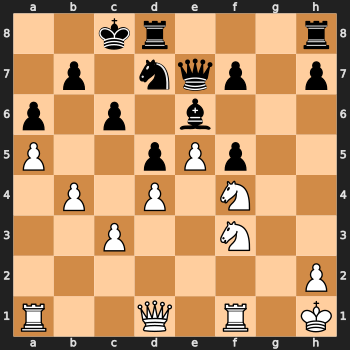

In [34]:
INDEX_DIR = "WhiteSpaceModel.index"
import sys, os, lucene
import chess.svg

from java.nio.file import Paths
from org.apache.lucene.analysis.standard import StandardAnalyzer
from org.apache.lucene.index import DirectoryReader
from org.apache.lucene.queryparser.classic import QueryParser
from org.apache.lucene.store import NIOFSDirectory
from org.apache.lucene.search import IndexSearcher


def run(searcher, analyzer, command):
    print ("Searching for:", command)
    escaped_command = command.replace("/", "\\/")
    query = QueryParser("contents", analyzer).parse(escaped_command)
    scoreDocs = searcher.search(query, 10).scoreDocs
    print ("%s total matching documents." % len(scoreDocs))

    for scoreDoc in scoreDocs:
        doc = searcher.doc(scoreDoc.doc)
        path = os.path.join(doc.get("path"), doc.get("name"))
        file = open(path)
        content = str(file.read())
        file.close()
        i = 1
        for line in content.split("\n"):
            if i == 1:
                print(line)
            if command in line:
                print(f"Position: https://lichess.org/{doc.get('name').split('.')[0]}#{i}")
                # print ('path:', doc.get("path"), 'name:', doc.get("name"))
                board = chess.Board(line)
                display(chess.svg.board(board, size=350))
                break
            i += 1

print( 'lucene', lucene.VERSION)
base_dir = os.path.dirname("/Users/tobiaswilfert/Documents/University/IR/chess-db/test.ipynb")
directory = NIOFSDirectory(Paths.get(os.path.join(base_dir, INDEX_DIR)))
searcher = IndexSearcher(DirectoryReader.open(directory))
analyzer = WhitespaceAnalyzer()
run(searcher, analyzer, command="2kr3r/1p1nqp1p/p1p1b3/P2pPp2/1P1P1N2/2P2N2/7P/R2Q1R1K")
del searcher

## Conlusion
E voila! We have found the position that we where looking for and not partial matches. This thus allows us to do exact match queries on the FEN notation of the board position.

## Examining the White space analyzer
Let us have a quick look under the hood to see what the whitespace analyzer does to a document.

In [32]:
from org.apache.lucene.analysis.core import WhitespaceAnalyzer
from org.apache.lucene.analysis.tokenattributes import CharTermAttribute
from java.io import StringReader

# Initialize the analyzer
analyzer = WhitespaceAnalyzer()

# The text to tokenize
text = '''
Headers(Event='Rated Blitz game', Site='https://lichess.org/zPyJ78zW', Date='2023.09.01', Round='-', White='SUPER2019', Black='vak2000', Result='1-0', UTCDate='2023.09.01', UTCTime='05:37:29', WhiteElo='2041', BlackElo='2029', WhiteRatingDiff='+5', BlackRatingDiff='-6', ECO='B15', Opening='Caro-Kann Defense', TimeControl='180+0', Termination='Time forfeit')
rnbqkbnr/pppppppp/8/8/8/2N5/PPPPPPPP/R1BQKBNR b KQkq - 1 1
rnbqkbnr/pp1ppppp/2p5/8/8/2N5/PPPPPPPP/R1BQKBNR w KQkq - 0 2
rnbqkbnr/pp1ppppp/2p5/8/3P4/2N5/PPP1PPPP/R1BQKBNR b KQkq - 0 2
rnbqkbnr/pp2pppp/2p5/3p4/3P4/2N5/PPP1PPPP/R1BQKBNR w KQkq - 0 3
rnbqkbnr/pp2pppp/2p5/3p4/3PP3/2N5/PPP2PPP/R1BQKBNR b KQkq - 0 3
rnbqkb1r/pp2pppp/2p2n2/3p4/3PP3/2N5/PPP2PPP/R1BQKBNR w KQkq - 1 4
rnbqkb1r/pp2pppp/2p2n2/3pP3/3P4/2N5/PPP2PPP/R1BQKBNR b KQkq - 0 4
rnbqkbnr/pp2pppp/2p5/3pP3/3P4/2N5/PPP2PPP/R1BQKBNR w KQkq - 1 5
rnbqkbnr/pp2pppp/2p5/3pP3/3P1P2/2N5/PPP3PP/R1BQKBNR b KQkq - 0 5
rnbqkbnr/pp3ppp/2p1p3/3pP3/3P1P2/2N5/PPP3PP/R1BQKBNR w KQkq - 0 6
rnbqkbnr/pp3ppp/2p1p3/3pP3/3P1P2/2N2N2/PPP3PP/R1BQKB1R b KQkq - 1 6
rnbqk1nr/pp3ppp/2p1p3/3pP3/1b1P1P2/2N2N2/PPP3PP/R1BQKB1R w KQkq - 2 7
rnbqk1nr/pp3ppp/2p1p3/3pP3/1b1P1P2/2NB1N2/PPP3PP/R1BQK2R b KQkq - 3 7
rnbqk2r/pp2nppp/2p1p3/3pP3/1b1P1P2/2NB1N2/PPP3PP/R1BQK2R w KQkq - 4 8
rnbqk2r/pp2nppp/2p1p3/3pP3/1b1P1P2/2NB1N2/PPP3PP/R1BQ1RK1 b kq - 5 8
rnbqk2r/pp2np1p/2p1p1p1/3pP3/1b1P1P2/2NB1N2/PPP3PP/R1BQ1RK1 w kq - 0 9
rnbqk2r/pp2np1p/2p1p1p1/3pP3/1b1P1P2/3B1N2/PPP1N1PP/R1BQ1RK1 b kq - 1 9
rnbqk2r/pp3p1p/2p1p1p1/3pPn2/1b1P1P2/3B1N2/PPP1N1PP/R1BQ1RK1 w kq - 2 10
rnbqk2r/pp3p1p/2p1p1p1/3pPn2/1b1P1P2/2PB1N2/PP2N1PP/R1BQ1RK1 b kq - 0 10
rnbqkb1r/pp3p1p/2p1p1p1/3pPn2/3P1P2/2PB1N2/PP2N1PP/R1BQ1RK1 w kq - 1 11
rnbqkb1r/pp3p1p/2p1p1p1/3pPn2/3P1PP1/2PB1N2/PP2N2P/R1BQ1RK1 b kq - 0 11
rnbqkb1r/pp2np1p/2p1p1p1/3pP3/3P1PP1/2PB1N2/PP2N2P/R1BQ1RK1 w kq - 1 12
rnbqkb1r/pp2np1p/2p1p1p1/3pPP2/3P2P1/2PB1N2/PP2N2P/R1BQ1RK1 b kq - 0 12
rnbqkb1r/pp2np1p/2p1p3/3pPp2/3P2P1/2PB1N2/PP2N2P/R1BQ1RK1 w kq - 0 13
rnbqkb1r/pp2np1p/2p1p3/3pPP2/3P4/2PB1N2/PP2N2P/R1BQ1RK1 b kq - 0 13
rnbqkb1r/pp3p1p/2p1p3/3pPn2/3P4/2PB1N2/PP2N2P/R1BQ1RK1 w kq - 0 14
rnbqkb1r/pp3p1p/2p1p3/3pPnB1/3P4/2PB1N2/PP2N2P/R2Q1RK1 b kq - 1 14
rnbqk2r/pp2bp1p/2p1p3/3pPnB1/3P4/2PB1N2/PP2N2P/R2Q1RK1 w kq - 2 15
rnbqk2r/pp2Bp1p/2p1p3/3pPn2/3P4/2PB1N2/PP2N2P/R2Q1RK1 b kq - 0 15
rnb1k2r/pp2qp1p/2p1p3/3pPn2/3P4/2PB1N2/PP2N2P/R2Q1RK1 w kq - 0 16
rnb1k2r/pp2qp1p/2p1p3/3pPB2/3P4/2P2N2/PP2N2P/R2Q1RK1 b kq - 0 16
rnb1k2r/pp2qp1p/2p5/3pPp2/3P4/2P2N2/PP2N2P/R2Q1RK1 w kq - 0 17
rnb1k2r/pp2qp1p/2p5/3pPp2/3P4/2P2N2/PP2N2P/R2Q1R1K b kq - 1 17
rn2k2r/pp2qp1p/2p1b3/3pPp2/3P4/2P2N2/PP2N2P/R2Q1R1K w kq - 2 18
rn2k2r/pp2qp1p/2p1b3/3pPp2/3P1N2/2P2N2/PP5P/R2Q1R1K b kq - 3 18
r3k2r/pp1nqp1p/2p1b3/3pPp2/3P1N2/2P2N2/PP5P/R2Q1R1K w kq - 4 19
r3k2r/pp1nqp1p/2p1b3/3pPp2/P2P1N2/2P2N2/1P5P/R2Q1R1K b kq - 0 19
2kr3r/pp1nqp1p/2p1b3/3pPp2/P2P1N2/2P2N2/1P5P/R2Q1R1K w - - 1 20
2kr3r/pp1nqp1p/2p1b3/P2pPp2/3P1N2/2P2N2/1P5P/R2Q1R1K b - - 0 20
2kr3r/1p1nqp1p/p1p1b3/P2pPp2/3P1N2/2P2N2/1P5P/R2Q1R1K w - - 0 21
2kr3r/1p1nqp1p/p1p1b3/P2pPp2/1P1P1N2/2P2N2/7P/R2Q1R1K b - - 0 21
2kr2r1/1p1nqp1p/p1p1b3/P2pPp2/1P1P1N2/2P2N2/7P/R2Q1R1K w - - 1 22
2kr2r1/1p1nqp1p/p1p1N3/P2pPp2/1P1P4/2P2N2/7P/R2Q1R1K b - - 0 22
'''

# Create a token stream from the text
tokenStream = analyzer.tokenStream("contents", StringReader(text))

# Get the CharTermAttribute from the token stream
termAtt = tokenStream.addAttribute(CharTermAttribute.class_)

# Reset the token stream
tokenStream.reset()

# Print all tokens in the stream
while tokenStream.incrementToken():
    print(termAtt.toString())

# Close the token stream
tokenStream.close()

Headers(Event='Rated
Blitz
game',
Site='https://lichess.org/zPyJ78zW',
Date='2023.09.01',
Round='-',
White='SUPER2019',
Black='vak2000',
Result='1-0',
UTCDate='2023.09.01',
UTCTime='05:37:29',
WhiteElo='2041',
BlackElo='2029',
WhiteRatingDiff='+5',
BlackRatingDiff='-6',
ECO='B15',
Opening='Caro-Kann
Defense',
TimeControl='180+0',
Termination='Time
forfeit')
rnbqkbnr/pppppppp/8/8/8/2N5/PPPPPPPP/R1BQKBNR
b
KQkq
-
1
1
rnbqkbnr/pp1ppppp/2p5/8/8/2N5/PPPPPPPP/R1BQKBNR
w
KQkq
-
0
2
rnbqkbnr/pp1ppppp/2p5/8/3P4/2N5/PPP1PPPP/R1BQKBNR
b
KQkq
-
0
2
rnbqkbnr/pp2pppp/2p5/3p4/3P4/2N5/PPP1PPPP/R1BQKBNR
w
KQkq
-
0
3
rnbqkbnr/pp2pppp/2p5/3p4/3PP3/2N5/PPP2PPP/R1BQKBNR
b
KQkq
-
0
3
rnbqkb1r/pp2pppp/2p2n2/3p4/3PP3/2N5/PPP2PPP/R1BQKBNR
w
KQkq
-
1
4
rnbqkb1r/pp2pppp/2p2n2/3pP3/3P4/2N5/PPP2PPP/R1BQKBNR
b
KQkq
-
0
4
rnbqkbnr/pp2pppp/2p5/3pP3/3P4/2N5/PPP2PPP/R1BQKBNR
w
KQkq
-
1
5
rnbqkbnr/pp2pppp/2p5/3pP3/3P1P2/2N5/PPP3PP/R1BQKBNR
b
KQkq
-
0
5
rnbqkbnr/pp3ppp/2p1p3/3pP3/3P1P2/2N5/PPP3PP/R1BQKBNR
w
KQkq
-
0
6
rn

## Conclusion
It seems to tokenize the document nicely, there are some useless tokens but they should not interfere with our queries.

## Wildcard queries
Exact matches are nice and dandy but it is very improbable that we will find a game that matches the exact position that we are looking for (Given a random position).
So let us try and see if the wildcard queries work, since this could be potentially very useful.

In [47]:
INDEX_DIR = "WhiteSpaceModel.index"
import sys, os, lucene
import chess.svg

from java.nio.file import Paths
from org.apache.lucene.analysis.standard import StandardAnalyzer
from org.apache.lucene.index import DirectoryReader
from org.apache.lucene.queryparser.classic import QueryParser, MultiFieldQueryParser, QueryParserBase
from org.apache.lucene.search import IndexSearcher, WildcardQuery
from org.apache.lucene.store import NIOFSDirectory
from org.apache.lucene.index import Term


def run(searcher, analyzer, command):
    print ("Searching for:", command)
    #query = WildcardQuery(QueryParserBase.escape(command))
    query = WildcardQuery(Term("contents", command))
    scoreDocs = searcher.search(query, 10).scoreDocs
    print ("%s total matching documents." % len(scoreDocs))

    for scoreDoc in scoreDocs:
        doc = searcher.doc(scoreDoc.doc)
        path = os.path.join(doc.get("path"), doc.get("name"))
        file = open(path)
        content = str(file.read())
        file.close()
        i = 1
        for line in content.split("\n"):
            if i == 1:
                print(line)
            if command in line:
                print(f"Position: https://lichess.org/{doc.get('name').split('.')[0]}#{i}")
                # print ('path:', doc.get("path"), 'name:', doc.get("name"))
                board = chess.Board(line)
                display(chess.svg.board(board, size=350))
                break
            # Tokenize the matched line
            # tokenStream = analyzer.tokenStream("contents", StringReader(line))
            # termAtt = tokenStream.addAttribute(CharTermAttribute.class_)
            # tokenStream.reset()
            # while tokenStream.incrementToken():
            #     print("Matched Token:", termAtt.toString())
            # tokenStream.close()
            i += 1

print( 'lucene', lucene.VERSION)
base_dir = os.path.dirname("/Users/tobiaswilfert/Documents/University/IR/chess-db/test.ipynb")
directory = NIOFSDirectory(Paths.get(os.path.join(base_dir, INDEX_DIR)))
searcher = IndexSearcher(DirectoryReader.open(directory))
analyzer = StandardAnalyzer()
# run(searcher, analyzer, command="2kr3r/1p1nqp1p/p1p1b3/P2pPp2/*/2P2N2/7P/R2Q1R1K")
run(searcher, analyzer, command="*/*/*/P2pPp2/*/*/*/*")
del searcher

lucene 9.7.0
Searching for: */*/*/P2pPp2/*/*/*/*
10 total matching documents.
Headers(Event='Rated Bullet tournament https://lichess.org/tournament/xwRYxgtz', Site='https://lichess.org/Nt4QydVL', Date='2023.09.01', Round='-', White='canekpr123', Black='Josue1888', Result='0-1', UTCDate='2023.09.01', UTCTime='02:48:58', WhiteElo='1889', BlackElo='2033', WhiteRatingDiff='-3', BlackRatingDiff='+3', ECO='D04', Opening="Queen's Pawn Game: Colle System, Grünfeld Formation", TimeControl='60+0', Termination='Time forfeit')
Matched Token: headers
Matched Token: event
Matched Token: rated
Matched Token: bullet
Matched Token: tournament
Matched Token: https
Matched Token: lichess.org
Matched Token: tournament
Matched Token: xwryxgtz
Matched Token: site
Matched Token: https
Matched Token: lichess.org
Matched Token: nt4qydvl
Matched Token: date
Matched Token: 2023.09.01
Matched Token: round
Matched Token: white
Matched Token: canekpr123
Matched Token: black
Matched Token: josue1888
Matched Token: r

## Observation
The problem here is that it is a bit tricky to find the board position in the file that matched the query. We are however intrusted in that information to be able to show the board on the one hand and on the other to be able to reconstructed the link to that very game position on the Lichess website. So let us try to find a way to do this.

lucene 9.7.0
Searching for: */*/*/P2pPp2/*/*/*/*
10 total matching documents.
scoreDoc doc=2045 score=1.0 shardIndex=-1
Matched line: r4rk1/p1q3pp/Qpp1p3/P2pPp2/1P1PbP2/2P3PB/5R1P/R5K1 b - - 0 25


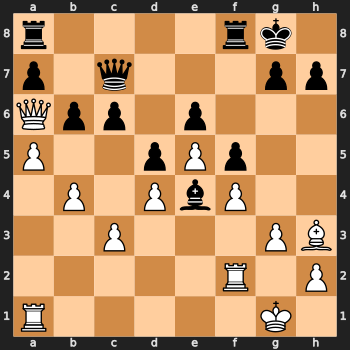

scoreDoc doc=3037 score=1.0 shardIndex=-1
Matched line: r5k1/4qpbp/2b3p1/P2pPp2/2pP4/2B2N1P/2Q2PP1/1R4K1 w - - 0 27


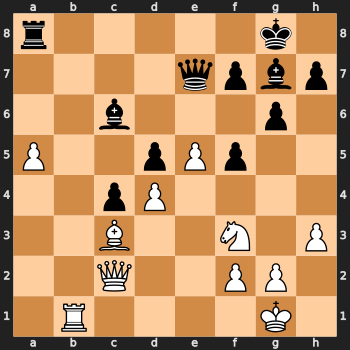

Matched line: r5k1/4qpbp/2b3p1/P2pPp2/1BpP4/5N1P/2Q2PP1/1R4K1 b - - 1 27


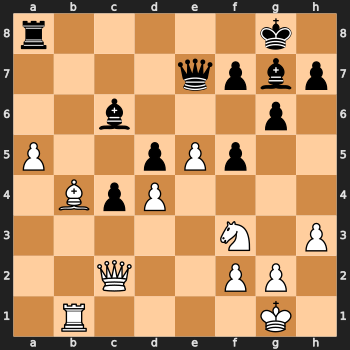

Matched line: r5k1/q4pbp/2b3p1/P2pPp2/1BpP4/5N1P/2Q2PP1/1R4K1 w - - 2 28


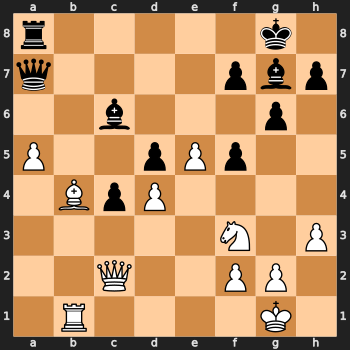

Matched line: r5k1/q4pbp/2b3p1/P2pPp2/1BpP4/5N1P/1Q3PP1/1R4K1 b - - 3 28


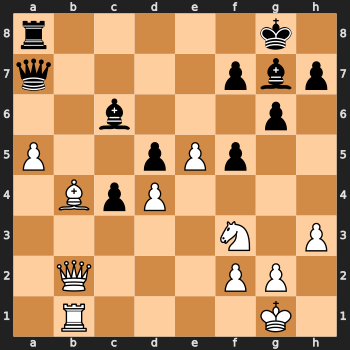

Matched line: r5k1/5pbp/q1b3p1/P2pPp2/1BpP4/5N1P/1Q3PP1/1R4K1 w - - 4 29


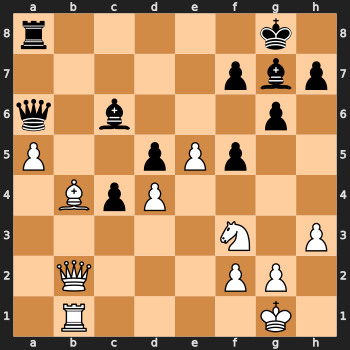

Matched line: r5k1/5pbp/q1b3p1/P2pPp2/1BpP4/7P/1Q1N1PP1/1R4K1 b - - 5 29


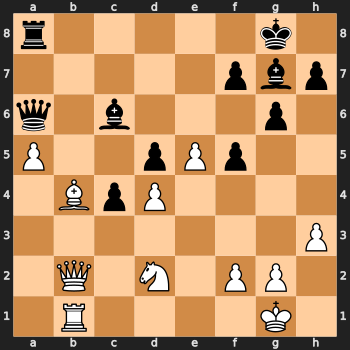

Matched line: r4bk1/5p1p/q1b3p1/P2pPp2/1BpP4/7P/1Q1N1PP1/1R4K1 w - - 6 30


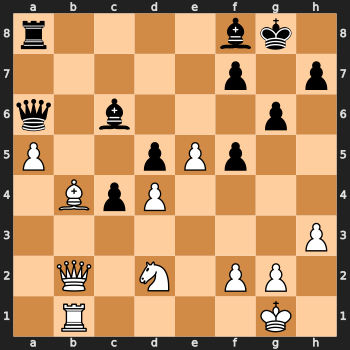

Matched line: r4Bk1/5p1p/q1b3p1/P2pPp2/2pP4/7P/1Q1N1PP1/1R4K1 b - - 0 30


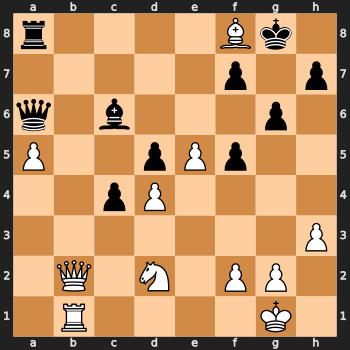

Matched line: r4k2/5p1p/q1b3p1/P2pPp2/2pP4/7P/1Q1N1PP1/1R4K1 w - - 0 31


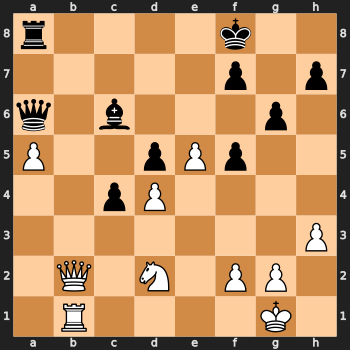

Matched line: r4k2/5p1p/qQb3p1/P2pPp2/2pP4/7P/3N1PP1/1R4K1 b - - 1 31


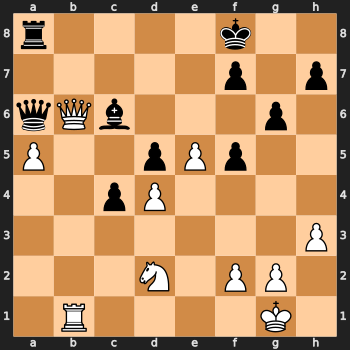

Matched line: r4k2/5p1p/1qb3p1/P2pPp2/2pP4/7P/3N1PP1/1R4K1 w - - 0 32


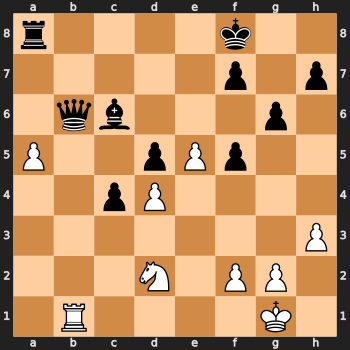

Matched line: r4k2/5p1p/1Rb3p1/P2pPp2/2pP4/7P/3N1PP1/6K1 b - - 0 32


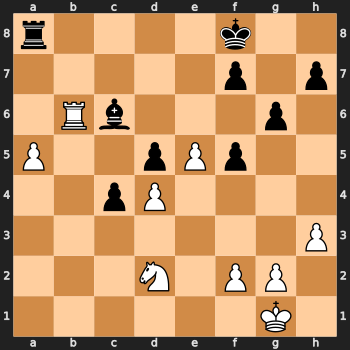

Matched line: r4k2/3b1p1p/1R4p1/P2pPp2/2pP4/7P/3N1PP1/6K1 w - - 1 33


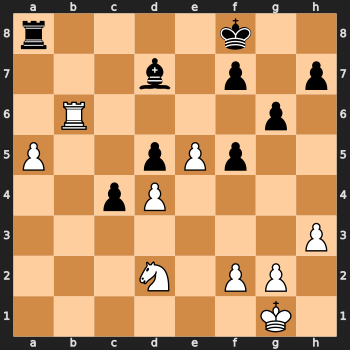

scoreDoc doc=5696 score=1.0 shardIndex=-1
Matched line: 8/pp3p2/2p2nk1/P2pPp2/1P3P2/2P3N1/6P1/6K1 b - - 0 34


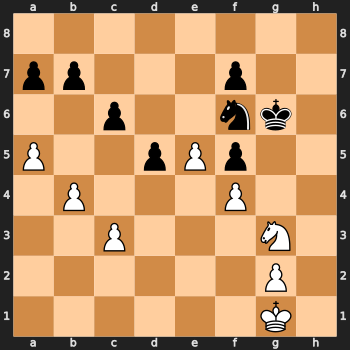

Matched line: 8/pp3p2/2p3k1/P2pPp2/1P2nP2/2P3N1/6P1/6K1 w - - 1 35


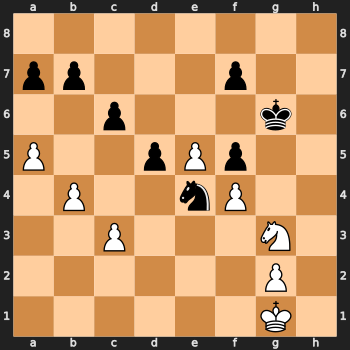

Matched line: 8/pp3p2/2p3k1/P2pPp2/1P2nP2/2P5/4N1P1/6K1 b - - 2 35


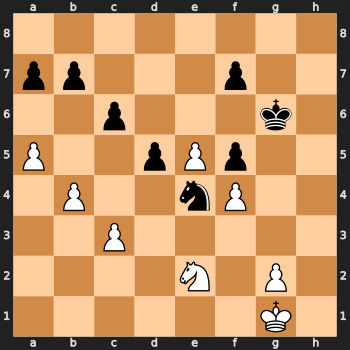

Matched line: 8/pp6/2p2pk1/P2pPp2/1P2nP2/2P5/4N1P1/6K1 w - - 0 36


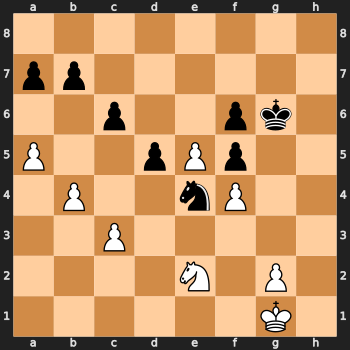

scoreDoc doc=8589 score=1.0 shardIndex=-1
Matched line: r1b1r1k1/1p4b1/pq2p1p1/P2pPp2/1P1N1P2/B3P1n1/4B1P1/R2Q1RK1 b - - 0 22


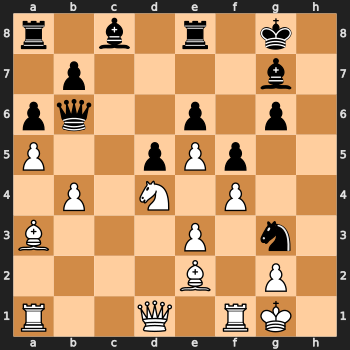

Matched line: r1b1r1k1/1p4b1/pq2p1p1/P2pPp2/1P1N1P2/B3P3/4n1P1/R2Q1RK1 w - - 0 23


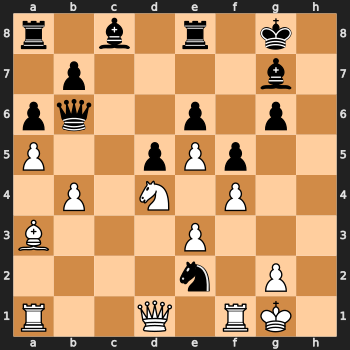

Matched line: r1b1r1k1/1p4b1/pq2p1p1/P2pPp2/1P1N1P2/B3P3/4Q1P1/R4RK1 b - - 0 23


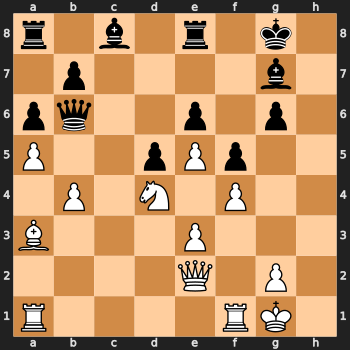

Matched line: r1bqr1k1/1p4b1/p3p1p1/P2pPp2/1P1N1P2/B3P3/4Q1P1/R4RK1 w - - 1 24


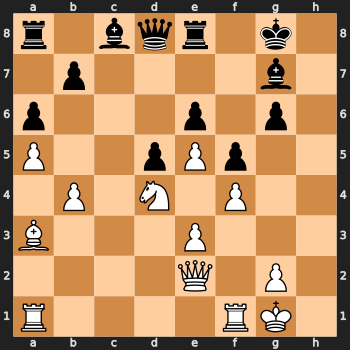

scoreDoc doc=9082 score=1.0 shardIndex=-1
Matched line: 2rq2rk/R2b1p2/8/P2pPp2/3P2p1/R1P2N2/3Q1PPP/6K1 w - - 0 24


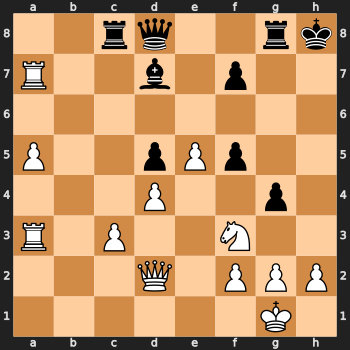

Matched line: 2rq2rk/R2b1p2/7Q/P2pPp2/3P2p1/R1P2N2/5PPP/6K1 b - - 1 24


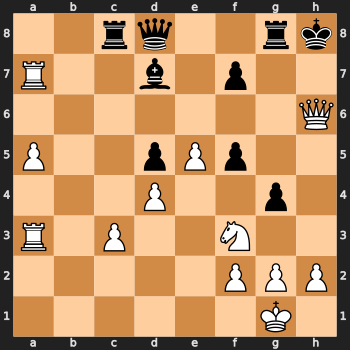

scoreDoc doc=11518 score=1.0 shardIndex=-1
Matched line: 5rk1/p4nbp/bq2p1p1/P2pPp2/1p1P4/5N1P/1P1Q1PP1/R3R1K1 b - - 0 24


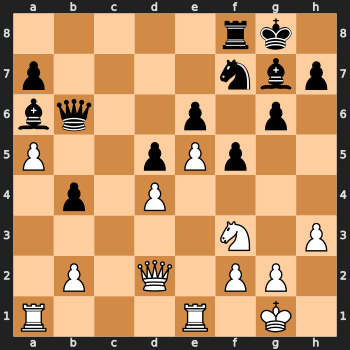

Matched line: 5rk1/pq3nbp/b3p1p1/P2pPp2/1p1P4/5N1P/1P1Q1PP1/R3R1K1 w - - 1 25


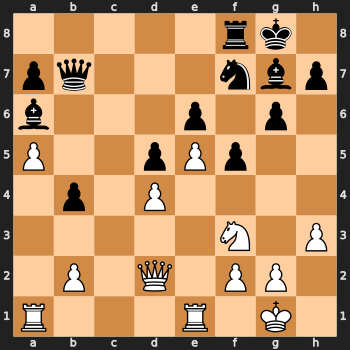

Matched line: 5rk1/pq3nbp/b3p1p1/P2pPp2/1p1P4/5N1P/1P1Q1PP1/R1R3K1 b - - 2 25


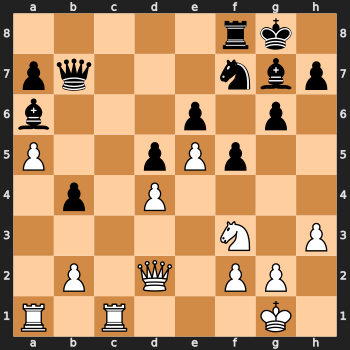

Matched line: 5rk1/pq3n1p/b3p1pb/P2pPp2/1p1P4/5N1P/1P1Q1PP1/R1R3K1 w - - 3 26


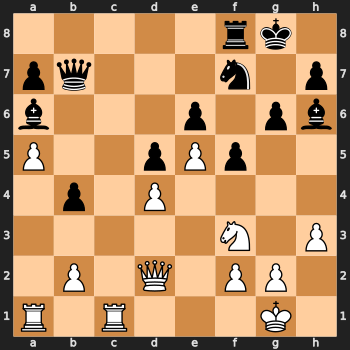

scoreDoc doc=13182 score=1.0 shardIndex=-1
Matched line: r3k2r/ppqbbp2/4p1n1/P2pPp2/1PpP1P2/2P2NRP/4NB1K/R2Q4 b kq - 0 22


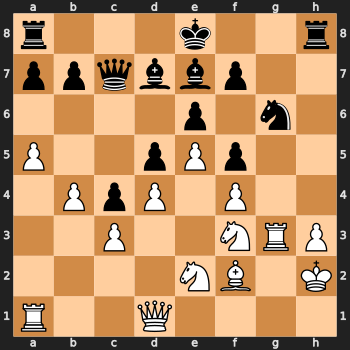

scoreDoc doc=15867 score=1.0 shardIndex=-1
Matched line: r2qk2r/1p1nb1p1/p1p1p1np/P2pPp2/1P1P4/2PQBNPP/3N1P2/R3K2R w KQkq f6 0 15


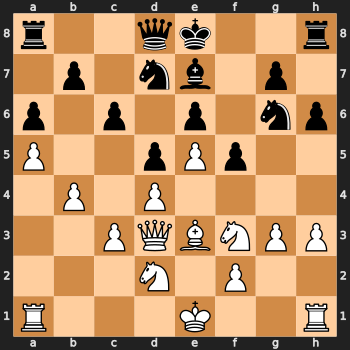

scoreDoc doc=16929 score=1.0 shardIndex=-1
Matched line: 3qb3/np2r1rk/p3p1pp/P2pPp2/1P1P1P1P/3NP3/2R5/2R1QBK1 b - - 2 28


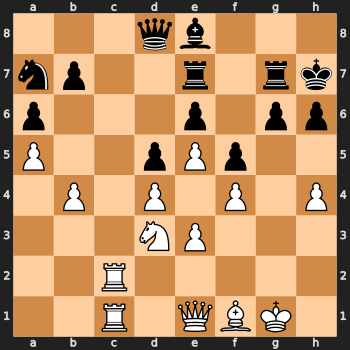

Matched line: 3q4/np2r1rk/p1b1p1pp/P2pPp2/1P1P1P1P/3NP3/2R5/2R1QBK1 w - - 3 29


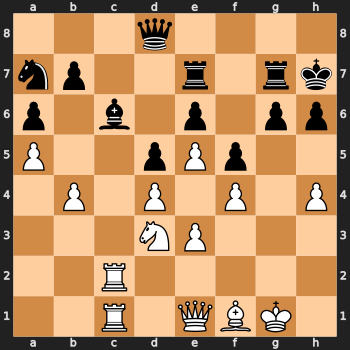

scoreDoc doc=21478 score=1.0 shardIndex=-1
Matched line: 2r4r/8/p1P1k3/P2pPp2/3B4/6Pp/5P1K/2R5 w - - 3 40


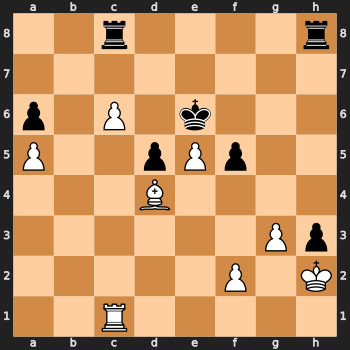

Matched line: 2r4r/2P5/p3k3/P2pPp2/3B4/6Pp/5P1K/2R5 b - - 0 40


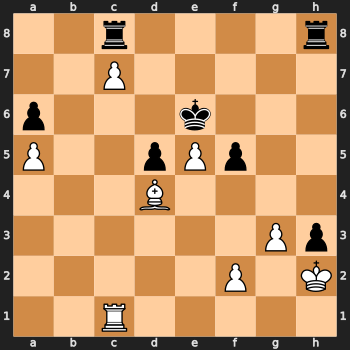

Matched line: 2r5/2P4r/p3k3/P2pPp2/3B4/6Pp/5P1K/2R5 w - - 1 41


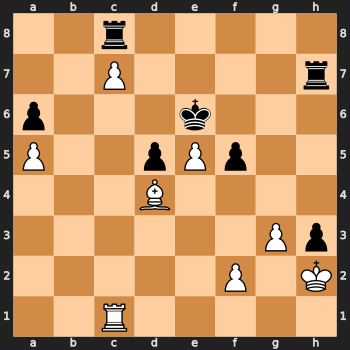

Matched line: 2r5/2P4r/p1R1k3/P2pPp2/3B4/6Pp/5P1K/8 b - - 2 41


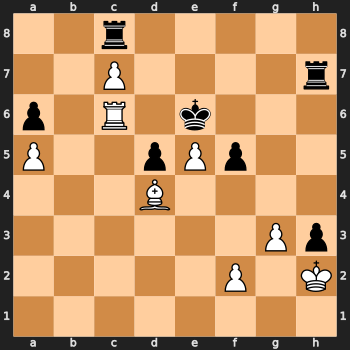

Matched line: 2r5/2Pk3r/p1R5/P2pPp2/3B4/6Pp/5P1K/8 w - - 3 42


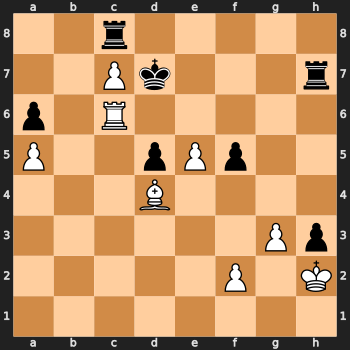

Matched line: 2r5/2Pk3r/p2R4/P2pPp2/3B4/6Pp/5P1K/8 b - - 4 42


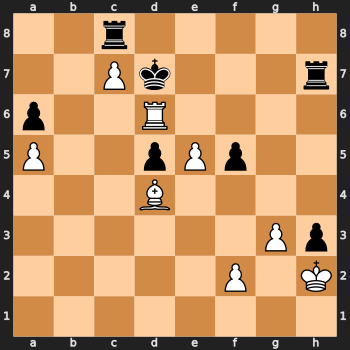

Matched line: 2r5/2k4r/p2R4/P2pPp2/3B4/6Pp/5P1K/8 w - - 0 43


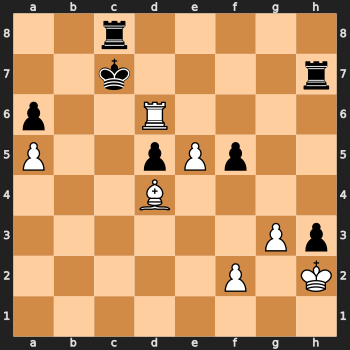

Matched line: 2r5/2k4r/pB1R4/P2pPp2/8/6Pp/5P1K/8 b - - 1 43


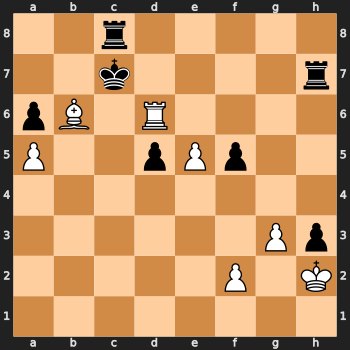

Matched line: 2r5/1k5r/pB1R4/P2pPp2/8/6Pp/5P1K/8 w - - 2 44


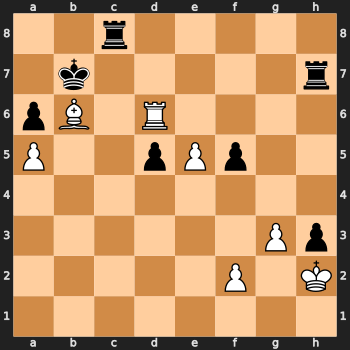

In [76]:
INDEX_DIR = "WhiteSpaceModel3.index"
import sys, os, lucene
import chess.svg

from java.nio.file import Paths
from org.apache.lucene.analysis.standard import StandardAnalyzer
from org.apache.lucene.index import DirectoryReader
from org.apache.lucene.queryparser.classic import QueryParser, MultiFieldQueryParser, QueryParserBase
from org.apache.lucene.search import IndexSearcher, WildcardQuery
from org.apache.lucene.store import NIOFSDirectory
from org.apache.lucene.index import Term


from org.apache.lucene.index import Term
from org.apache.lucene.search import WildcardQuery

def run(searcher, analyzer, command):
    print ("Searching for:", command)
    term = Term("contents", command)
    query = WildcardQuery(term)
    scoreDocs = searcher.search(query, 10).scoreDocs
    print ("%s total matching documents." % len(scoreDocs))

    # Get the terms from the index that match the query
    # termsEnum = searcher.getIndexReader().terms(term).iterator()

    # Iterate over the terms and print them
    # while termsEnum.next():
    #    print(termsEnum.term().utf8ToString())

    for scoreDoc in scoreDocs:
        print ("scoreDoc", scoreDoc)
        # doc = searcher.doc(scoreDoc.doc)
        # docId = scoreDoc.doc  # Get the document ID

        # # Get the Terms for a specific field in the document
        # terms = searcher.getIndexReader().getTermVector(docId, "contents")

        # # Check if the document has terms
        # if terms is not None:
        #     # Get a TermsEnum for iterating over the terms
        #     termsEnum = terms.iterator()

        #     # Iterate over the terms and print them
        #     while termsEnum.next() != TermsEnum.NO_MORE_TERMS:
        #         print(termsEnum.term().utf8ToString())
        # else:
        #     print("No terms for document ID:", docId)

        # path = os.path.join(doc.get("path"), doc.get("name"))
        # file = open(path)
        # content = str(file.read())
        # file.close()
        # Get the document from the ScoreDoc
        doc = searcher.doc(scoreDoc.doc)
        # print(doc)

        # for field in doc.getFields():
        #     print("Field name:", field.name())
        #     print("Field value:", field.stringValue())

        # Get the contents field from the document
        contents = doc.get("contents")
        
        for line in contents.split("\n"):
            import fnmatch
            if fnmatch.fnmatch(line, command):
                print("Matched line:", line)
                board = chess.Board(line)
                display(chess.svg.board(board, size=350))
        #print(contents)

        # # Create a new token stream from the contents
        # tokenStream = analyzer.tokenStream("contents", contents)

        # # Get the CharTermAttribute from the token stream
        # termAtt = tokenStream.getAttribute(CharTermAttribute)

        # # Reset the token stream
        # tokenStream.reset()

        # # Iterate over the tokens in the token stream
        # while tokenStream.incrementToken():
        #     # Print the current token
        #     # print(termAtt.toString())
        #     import fnmatch
        #     # Get the current token
        #     token = termAtt.toString()

        #     # Check if the token matches the pattern
        #     if fnmatch.fnmatch(token, command):
        #         print("Matched token:", token)

        # # Close the token stream
        # tokenStream.close()

print( 'lucene', lucene.VERSION)
base_dir = "/Users/tobiaswilfert/Documents/University/IR/chess-db"
directory = NIOFSDirectory(Paths.get(os.path.join(base_dir, INDEX_DIR)))
searcher = IndexSearcher(DirectoryReader.open(directory))
analyzer = LimitTokenCountAnalyzer(WhitespaceAnalyzer(), 1048576)
run(searcher, analyzer, command="*/*/*/P2pPp2/*/*/*/*")
del searcher

## Conclusion
After a decent amount of trial and error the Wildcard queries seem to work. We can match games using only a subset of the position. Interestingly enough although Lucene warned us that the query would be slow it was reasonably fast. The question now of course becomes how do we know which peaces to replace by a wildcard and which not. This is a tricky question and we will need to do considerable reasoning to find good solutions.

Furthermore the using the 250,000 games seems to go very well so let us try and scale the database up to 2 million games.

## Large dataset test
Let us try if we can index the 2 million games.

In [2]:
INDEX_DIR = "2MGames.index"

import sys, os, lucene, threading, time
from datetime import datetime

from java.nio.file import Paths
from org.apache.lucene.analysis.miscellaneous import LimitTokenCountAnalyzer
from org.apache.lucene.analysis.standard import StandardAnalyzer
from org.apache.lucene.document import Document, Field, FieldType
from org.apache.lucene.index import \
    FieldInfo, IndexWriter, IndexWriterConfig, IndexOptions
from org.apache.lucene.store import NIOFSDirectory
from org.apache.lucene.analysis.core import WhitespaceAnalyzer


class Ticker(object):

    def __init__(self):
        self.tick = True

    def run(self):
        while self.tick:
            sys.stdout.write('.')
            sys.stdout.flush()
            time.sleep(1.0)

class IndexFiles(object):
    """Usage: python IndexFiles <doc_directory>"""

    def __init__(self, root, storeDir, analyzer):
        if not os.path.exists(storeDir):
            os.mkdir(storeDir)

        store = NIOFSDirectory(Paths.get(storeDir))
        analyzer = LimitTokenCountAnalyzer(analyzer, 1048576)
        config = IndexWriterConfig(analyzer)
        config.setOpenMode(IndexWriterConfig.OpenMode.CREATE)
        writer = IndexWriter(store, config)

        self.indexDocs(root, writer)
        ticker = Ticker()
        print ('commit index'),
        threading.Thread(target=ticker.run).start()
        writer.commit()
        writer.close()
        ticker.tick = False
        print ('done')

    def indexDocs(self, root, writer):
        t1 = FieldType()
        t1.setStored(True)
        t1.setTokenized(False)
        t1.setIndexOptions(IndexOptions.DOCS_AND_FREQS)

        t2 = FieldType()
        t2.setStored(True)
        t2.setTokenized(True)
        #t2.setStoreTermVectors(True)
        t2.setIndexOptions(IndexOptions.DOCS_AND_FREQS_AND_POSITIONS)

        for root, dirnames, filenames in os.walk(root):
            for filename in filenames:
                if not filename.endswith('.txt'):
                    continue
                # print ("adding", filename)
                try:
                    path = os.path.join(root, filename)
                    file = open(path)
                    contents = str(file.read()) # , 'iso-8859-1')
                    file.close()
                    doc = Document()
                    doc.add(Field("name", filename, t1))
                    doc.add(Field("path", root, t1))
                    if len(contents) > 0:
                        doc.add(Field("contents", contents, t2))
                        # print(doc.get("contents"))
                    else:
                        print ("warning: no content in %s" % filename)
                    writer.addDocument(doc)
                except Exception as e:
                    print ("Failed in indexDocs:", e)

start = datetime.now()
try:
    base_dir = "/Users/tobiaswilfert/Documents/University/IR/chess-db"
    IndexFiles("./filter_more/", os.path.join(base_dir, INDEX_DIR),
                WhitespaceAnalyzer())
    end = datetime.now()
    print (end - start)
except Exception as e:
    print ("Failed: ", e)
    raise e

commit index
......................done
0:19:26.084482


20 minutes to index, not that bad. Let us see how the queries perform.

lucene 9.7.0
Searching for: */*/*/P2pPp2/*/*/*/*
1000 total matching documents.
scoreDoc doc=2617 score=1.0 shardIndex=-1
Matched line: 2r5/2r3k1/1p2p1pp/P2pPp2/3P3P/2P3P1/7K/1NR5 b - - 0 34


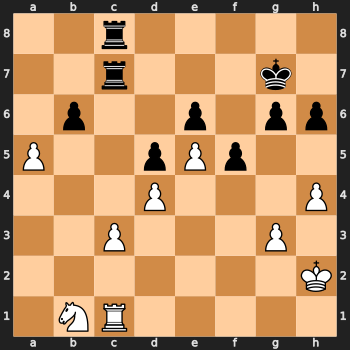

scoreDoc doc=3025 score=1.0 shardIndex=-1
Matched line: 8/2p1k1n1/pp2b1r1/P2pPp2/3P4/2P5/2P3PB/R4RK1 b - - 0 35


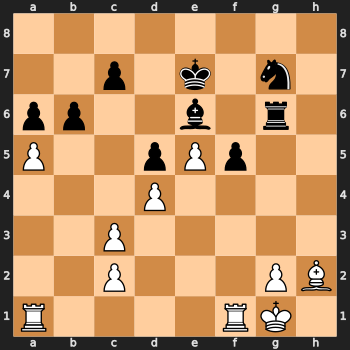

scoreDoc doc=3711 score=1.0 shardIndex=-1
Matched line: 2kr3r/ppp1qpp1/1b2b2p/P2pPp2/3P4/1QP2N2/1P1N1PPP/R3R1K1 b - - 0 15


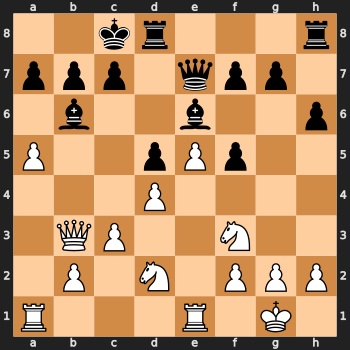

scoreDoc doc=5260 score=1.0 shardIndex=-1
Matched line: 2r3k1/6p1/1Pq1p2p/P2pPp2/1B2r3/2P2Q2/6PP/R5K1 b - - 0 35


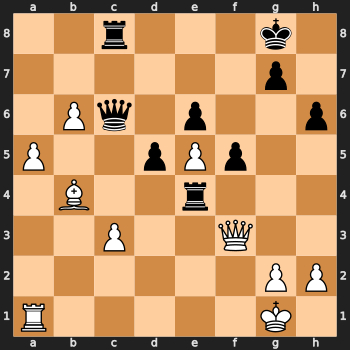

scoreDoc doc=5938 score=1.0 shardIndex=-1
Matched line: 2kr3r/b3q3/p3p1pp/P2pPp2/2pP1P2/2NnB2Q/1P1R2PP/R5K1 b - - 0 22


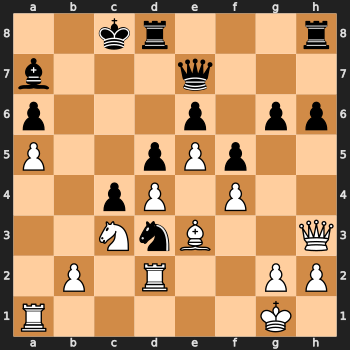

Matched line: 2k3rr/b3q3/p3p1pp/P2pPp2/2pP1P2/2NnB2Q/1P1R2PP/R5K1 w - - 1 23


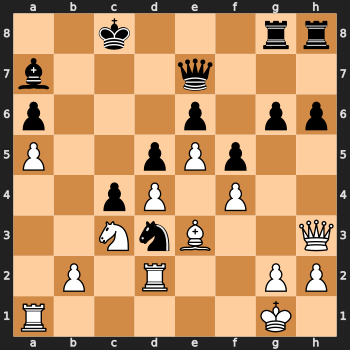

Matched line: 2k3rr/b3q3/p3p1pp/P2pPp2/N1pP1P2/3nB2Q/1P1R2PP/R5K1 b - - 2 23


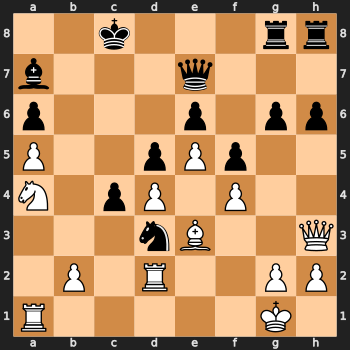

Matched line: 2k3rr/b3q3/p3p2p/P2pPp2/N1pP1p2/3nBQ2/1P1R2PP/R5K1 w - - 0 25


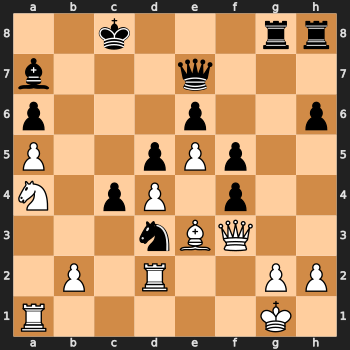

Matched line: 2k3rr/b3q3/p3p2p/P2pPp2/N1pP1B2/3n1Q2/1P1R2PP/R5K1 b - - 0 25


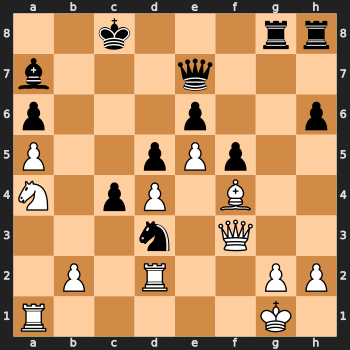

Matched line: 2k4r/4q3/p3p3/P2pPp2/N1pb1Brp/3n1QP1/1PR4P/R4K2 w - - 0 29


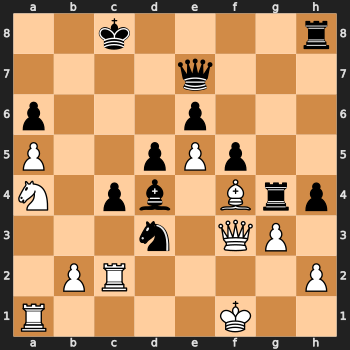

In [6]:
INDEX_DIR = "2MGames.index"
import sys, os, lucene
import chess.svg

from java.nio.file import Paths
from org.apache.lucene.analysis.standard import StandardAnalyzer
from org.apache.lucene.index import DirectoryReader
from org.apache.lucene.queryparser.classic import QueryParser, MultiFieldQueryParser, QueryParserBase
from org.apache.lucene.search import IndexSearcher, WildcardQuery
from org.apache.lucene.store import NIOFSDirectory
from org.apache.lucene.index import Term
from org.apache.lucene.index import Term
from org.apache.lucene.search import WildcardQuery

def run(searcher, analyzer, command):
    print ("Searching for:", command)
    term = Term("contents", command)
    query = WildcardQuery(term)
    scoreDocs = searcher.search(query, 1000).scoreDocs
    print ("%s total matching documents." % len(scoreDocs))

    for scoreDoc in scoreDocs[:5]:
        print ("scoreDoc", scoreDoc)
        doc = searcher.doc(scoreDoc.doc)
        contents = doc.get("contents")
        
        for line in contents.split("\n"):
            import fnmatch
            if fnmatch.fnmatch(line, command + "*"):
                print("Matched line:", line)
                board = chess.Board(line)
                display(chess.svg.board(board, size=350))

print( 'lucene', lucene.VERSION)
base_dir = "/Users/tobiaswilfert/Documents/University/IR/chess-db"
directory = NIOFSDirectory(Paths.get(os.path.join(base_dir, INDEX_DIR)))
searcher = IndexSearcher(DirectoryReader.open(directory))
analyzer = LimitTokenCountAnalyzer(WhitespaceAnalyzer(), 1048576)
run(searcher, analyzer, command="*/*/*/P2pPp2/*/*/*/*")
del searcher

26 seconds to query a rather complex wildcard query, not bad at all. Let us try to query the entire board position.

Searching for: 2k4r/4q3/p3p3/P2pPp2/N1pb1Brp/3n1QP1/1PR4P/R4K2
1 total matching documents.
scoreDoc doc=5938 score=1.0 shardIndex=-1
Matched line: 2k4r/4q3/p3p3/P2pPp2/N1pb1Brp/3n1QP1/1PR4P/R4K2 w - - 0 29


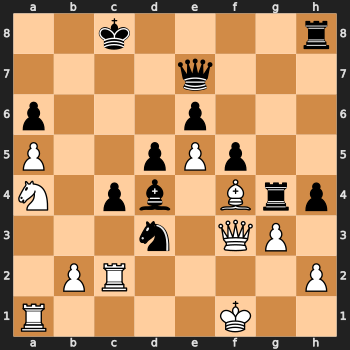

In [8]:
INDEX_DIR = "2MGames.index"
import sys, os, lucene
import chess.svg

from java.nio.file import Paths
from org.apache.lucene.analysis.standard import StandardAnalyzer
from org.apache.lucene.index import DirectoryReader
from org.apache.lucene.queryparser.classic import QueryParser, MultiFieldQueryParser, QueryParserBase
from org.apache.lucene.search import IndexSearcher, WildcardQuery
from org.apache.lucene.store import NIOFSDirectory
from org.apache.lucene.index import Term
from org.apache.lucene.index import Term
from org.apache.lucene.search import WildcardQuery

def run(searcher, analyzer, command):
    print ("Searching for:", command)
    term = Term("contents", command)
    query = WildcardQuery(term)
    scoreDocs = searcher.search(query, 1000).scoreDocs
    print ("%s total matching documents." % len(scoreDocs))

    for scoreDoc in scoreDocs[:5]:
        print ("scoreDoc", scoreDoc)
        doc = searcher.doc(scoreDoc.doc)
        contents = doc.get("contents")
        
        for line in contents.split("\n"):
            import fnmatch
            if fnmatch.fnmatch(line, command + "*"):
                print("Matched line:", line)
                board = chess.Board(line)
                display(chess.svg.board(board, size=350))
                
base_dir = "/Users/tobiaswilfert/Documents/University/IR/chess-db"
directory = NIOFSDirectory(Paths.get(os.path.join(base_dir, INDEX_DIR)))
searcher = IndexSearcher(DirectoryReader.open(directory))
analyzer = LimitTokenCountAnalyzer(WhitespaceAnalyzer(), 1048576)
run(searcher, analyzer, command="2k4r/4q3/p3p3/P2pPp2/N1pb1Brp/3n1QP1/1PR4P/R4K2")
del searcher

Searching for: *k*/*/*/P2pPp2/*N*/*B*/*P*P*/R*K*
28 total matching documents.
scoreDoc doc=5938 score=1.0 shardIndex=-1
Matched line: 2k3rr/b3q3/p3p1pp/P2pPp2/N1pP1P2/3nB2Q/1P1R2PP/R5K1 b - - 2 23


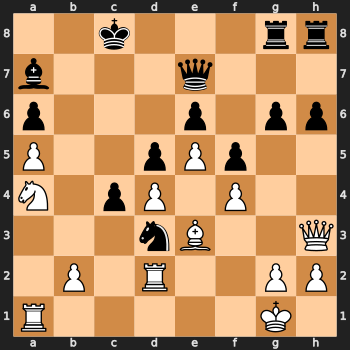

Matched line: 2k3rr/b3q3/p3p2p/P2pPp2/N1pP1p2/3nBQ2/1P1R2PP/R5K1 w - - 0 25


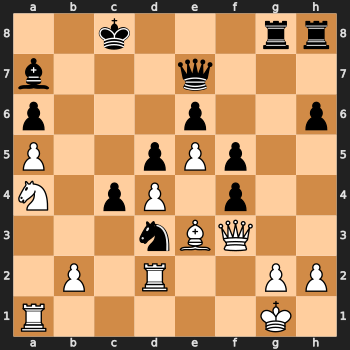

scoreDoc doc=296326 score=1.0 shardIndex=-1
Matched line: rnb3k1/pp1nbrpp/1q2p3/P2pPp2/2pP1N2/2PB1N2/1P3PPP/R1BQ1RK1 b - - 0 12


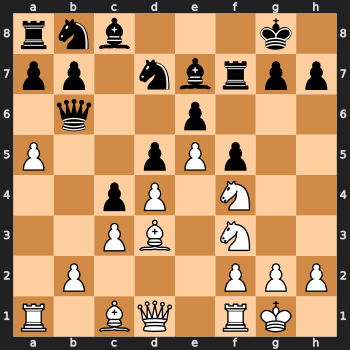

Matched line: rnb3k1/pp1nbrpp/2q1p3/P2pPp2/2pP1N2/2PB1N2/1P3PPP/R1BQ1RK1 w - - 1 13


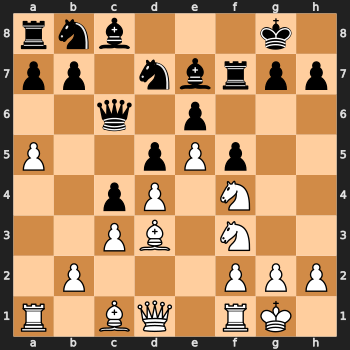

scoreDoc doc=342648 score=1.0 shardIndex=-1
Matched line: r3qrk1/1p1bb1pp/pBn1p3/P2pPp2/3NnP2/2PB1N2/1P4PP/R2Q1RK1 b - - 8 17


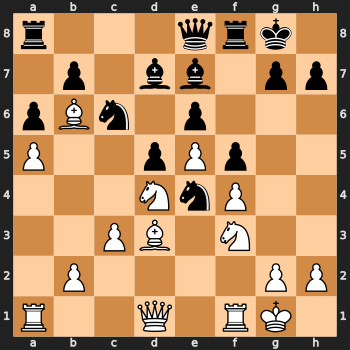

Matched line: r3qrk1/1p1bb1pp/pB2p3/P2pPp2/3NnP2/2PB4/1P4PP/R2Q1RK1 b - - 0 18


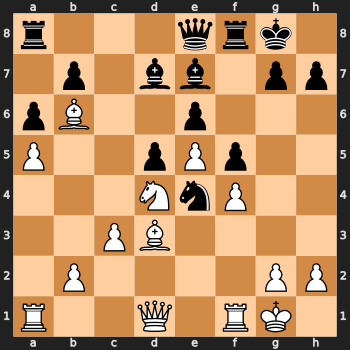

Matched line: r3qr1k/1p1bb1pp/pB2p3/P2pPp2/3NnP2/2PB4/1P4PP/R2Q1RK1 w - - 1 19


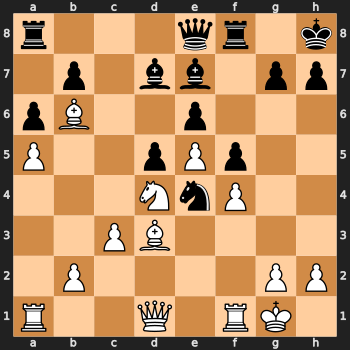

Matched line: r3qr1k/1p1bb1pp/pB2p3/P2pPp2/3NnP2/2PB1R2/1P4PP/R2Q2K1 b - - 2 19


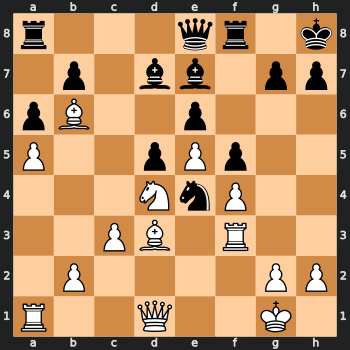

Matched line: r3q1rk/1p1bb1pp/pB2p3/P2pPp2/3NnP2/2PB1R2/1P4PP/R2Q2K1 w - - 3 20


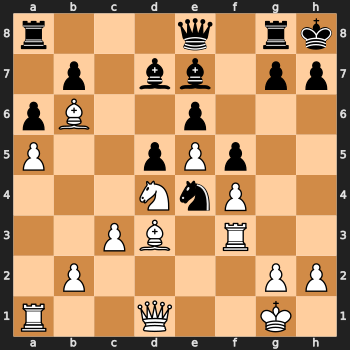

Matched line: r3q1rk/1p1bb1pp/pB2p3/P2pPp2/3NnP2/2PB1R2/1P2Q1PP/R5K1 b - - 4 20


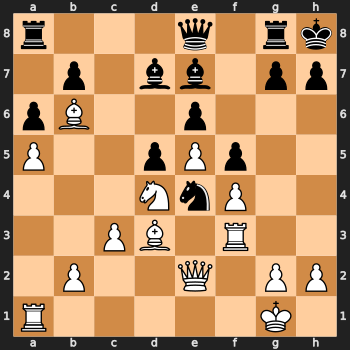

scoreDoc doc=489694 score=1.0 shardIndex=-1
Matched line: 4r1k1/1p1qr1b1/p1p3pp/P2pPp2/4n2N/1QP1B1P1/1P3PBP/R5K1 b - - 1 23


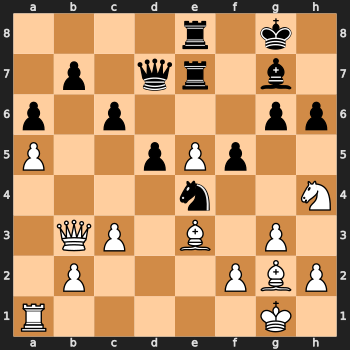

scoreDoc doc=581813 score=1.0 shardIndex=-1
Matched line: r3k2r/pp1q2b1/2p1p3/P2pPp2/NPnP1Ppp/3QB3/2P3PP/R4RK1 w kq f6 0 21


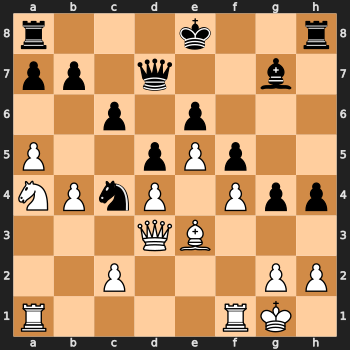

In [19]:
directory = NIOFSDirectory(Paths.get(os.path.join(base_dir, INDEX_DIR)))
searcher = IndexSearcher(DirectoryReader.open(directory))
analyzer = LimitTokenCountAnalyzer(WhitespaceAnalyzer(), 1048576)
run(searcher, analyzer, command="*k*/*/*/P2pPp2/*N*/*B*/*P*P*/R*K*")
del searcher

## Conclusion
We now see that with a sufficiently abstract position we will match multiple board positions in the a game since subsequent board positions are very similar. We might want to filter on that and only show only the first match.

Searching for: *k*/*/*/P2pPp2/*N*/*B*/*P*P*/R*K*
28 total matching documents.
scoreDoc doc=59176 score=1.0 shardIndex=-1
Matched line: 4r1k1/1p1qr1b1/p1p3pp/P2pPp2/4n2N/1QP1B1P1/1P3PBP/R5K1 b - - 1 23


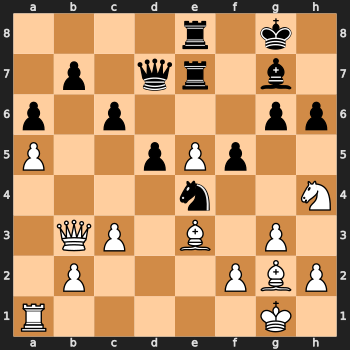

Found 0 other matches in the game.
scoreDoc doc=151295 score=1.0 shardIndex=-1
Matched line: r3k2r/pp1q2b1/2p1p3/P2pPp2/NPnP1Ppp/3QB3/2P3PP/R4RK1 w kq f6 0 21


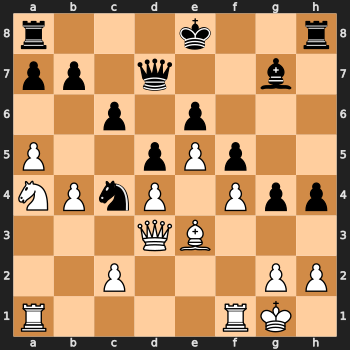

Found 0 other matches in the game.
scoreDoc doc=177459 score=1.0 shardIndex=-1
Matched line: r2qk2r/pp1nbp1p/6p1/P2pPp2/2NP4/5B2/1P4PP/R1BQ1RK1 b kq - 0 15


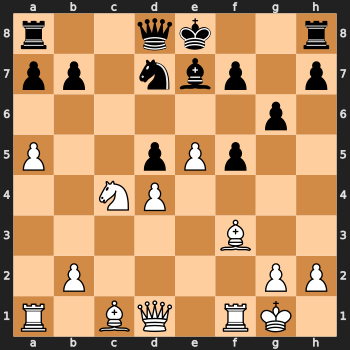

Found 0 other matches in the game.
scoreDoc doc=296370 score=1.0 shardIndex=-1
Matched line: rnb3k1/pp1nbrpp/1q2p3/P2pPp2/2pP1N2/2PB1N2/1P3PPP/R1BQ1RK1 b - - 0 12


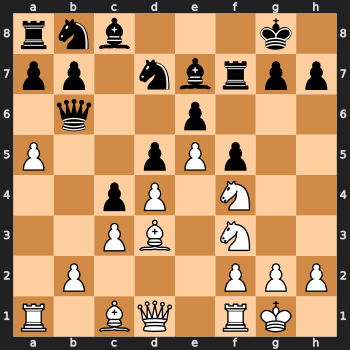

Found 1 other matches in the game.
scoreDoc doc=342692 score=1.0 shardIndex=-1
Matched line: r3qrk1/1p1bb1pp/pBn1p3/P2pPp2/3NnP2/2PB1N2/1P4PP/R2Q1RK1 b - - 8 17


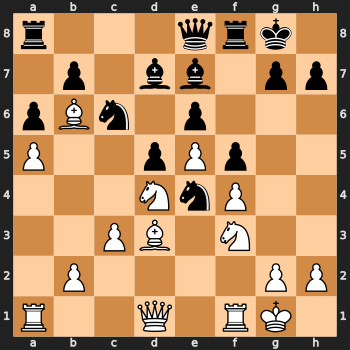

Found 5 other matches in the game.


In [3]:
INDEX_DIR = "2MGames.index"
import sys, os, lucene
import chess.svg
import fnmatch

from java.nio.file import Paths
from org.apache.lucene.analysis.standard import StandardAnalyzer
from org.apache.lucene.index import DirectoryReader
from org.apache.lucene.queryparser.classic import QueryParser, MultiFieldQueryParser, QueryParserBase
from org.apache.lucene.search import IndexSearcher, WildcardQuery
from org.apache.lucene.store import NIOFSDirectory
from org.apache.lucene.index import Term
from org.apache.lucene.index import Term
from org.apache.lucene.search import WildcardQuery

def run(searcher, analyzer, command):
    print ("Searching for:", command)
    term = Term("contents", command)
    query = WildcardQuery(term)
    scoreDocs = searcher.search(query, 1000).scoreDocs
    print ("%s total matching documents." % len(scoreDocs))

    for scoreDoc in scoreDocs[:5]:
        print ("scoreDoc", scoreDoc)
        doc = searcher.doc(scoreDoc.doc)
        contents = doc.get("contents")
        
        count = 0
        
        for line in contents.split("\n"):
            if fnmatch.fnmatch(line, command + "*"):
                if count == 0:
                    print("Matched line:", line)
                    board = chess.Board(line)
                    display(chess.svg.board(board, size=350))
                count += 1
        
        print(f"Found {count-1} other matches in the game.")
                
base_dir = "/Users/tobiaswilfert/Documents/University/IR/chess-db"
directory = NIOFSDirectory(Paths.get(os.path.join(base_dir, INDEX_DIR)))
searcher = IndexSearcher(DirectoryReader.open(directory))
analyzer = LimitTokenCountAnalyzer(WhitespaceAnalyzer(), 1048576)
run(searcher, analyzer, command="*k*/*/*/P2pPp2/*N*/*B*/*P*P*/R*K*")
del searcher

## Test Fuzzy queries (these use Levenshtein distance as distance metric)

Now finding the matching position in the game becomes very tricky.

Searching for: 2k4r/4q3/p3p3/P2pPp2/N1pb1Brp/3n1QP1/1PR4P/R4K2
1 total matching documents.
scoreDoc doc=866483 score=6.462341 shardIndex=-1
Matched line: 2k4r/4q3/p3p3/P2pPp2/N1pb1Brp/3n1QP1/1PR4P/R4K2


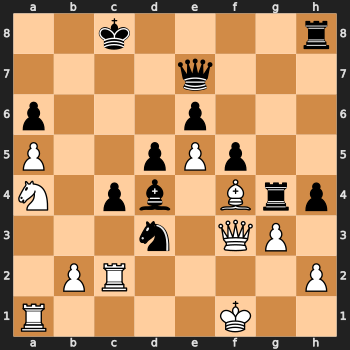

Found 0 other matches in the game.


In [4]:
# TODO: Make this entire code nicer to be easier to work with.
INDEX_DIR = "2MGames.index"
import os
import chess.svg
from Levenshtein import distance

from java.nio.file import Paths
from org.apache.lucene.index import DirectoryReader
from org.apache.lucene.search import IndexSearcher, FuzzyQuery
from org.apache.lucene.store import NIOFSDirectory
from org.apache.lucene.index import Term
from org.apache.lucene.index import Term

def run(searcher, analyzer, command, n):
    print ("Searching for:", command)
    
    term = Term("contents", command)
    query = FuzzyQuery(term, n)
    scoreDocs = searcher.search(query, 1000).scoreDocs
    
    print ("%s total matching documents." % len(scoreDocs))

    for scoreDoc in scoreDocs[:5]:
        print ("scoreDoc", scoreDoc)
        
        doc = searcher.doc(scoreDoc.doc)
        contents = doc.get("contents")
        count = 0
        
        for line in contents.split("\n"):
            line = line.split(" ")[0]
            
            if distance(line, command) <= n:
                if count == 0:
                    print("Matched line:", line)
                    board = chess.Board(line)
                    display(chess.svg.board(board, size=350))
                count += 1
        
        print(f"Found {count-1} other matches in the game.")
                

directory = NIOFSDirectory(Paths.get("/Users/tobiaswilfert/Documents/University/IR/chess-db/2MGames.index"))
searcher = IndexSearcher(DirectoryReader.open(directory))
analyzer = LimitTokenCountAnalyzer(WhitespaceAnalyzer(), 1048576)

run(searcher, analyzer, "2k4r/4q3/p3p3/P2pPp2/N1pb1Brp/3n1QP1/1PR4P/R4K2", 2)
del searcher

Searching for: 2k4r/4q3/p3p3/P2pPp2/N1pb1Brp/3n1QP1/1PR4P/R4K2
1 total matching documents.
scoreDoc doc=866483 score=6.462341 shardIndex=-1
Matched line: 2k4r/4q3/p3p3/P2pPp2/N1pb1Brp/3n1QP1/1PR4P/R4K2


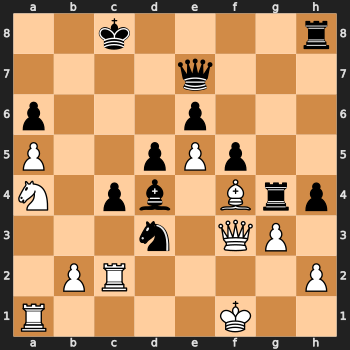

Found 0 other matches in the game.


In [6]:
directory = NIOFSDirectory(Paths.get("/Users/tobiaswilfert/Documents/University/IR/chess-db/2MGames.index"))
searcher = IndexSearcher(DirectoryReader.open(directory))
analyzer = LimitTokenCountAnalyzer(WhitespaceAnalyzer(), 1048576)

run(searcher, analyzer, "2k4r/4q3/p3p3/P2pPp2/N1pb1Brp/3n1QP1/1PR4P/R4K2", 2)
del searcher

In [7]:
directory = NIOFSDirectory(Paths.get("/Users/tobiaswilfert/Documents/University/IR/chess-db/2MGames.index"))
searcher = IndexSearcher(DirectoryReader.open(directory))
analyzer = LimitTokenCountAnalyzer(WhitespaceAnalyzer(), 1048576)

run(searcher, analyzer, "2k4r/4q3/p3p3/P2pPp2/N1pb1Brp/3n1QP1/1PR4P/R4K2", 4)
del searcher

Searching for: 2k4r/4q3/p3p3/P2pPp2/N1pb1Brp/3n1QP1/1PR4P/R4K2


JavaError: <super: <class 'JavaError'>, <JavaError object>>
    Java stacktrace:
java.lang.IllegalArgumentException: maxEdits must be between 0 and 2
	at org.apache.lucene.search.FuzzyQuery.<init>(FuzzyQuery.java:96)
	at org.apache.lucene.search.FuzzyQuery.<init>(FuzzyQuery.java:120)
	at org.apache.lucene.search.FuzzyQuery.<init>(FuzzyQuery.java:134)
	at org.apache.lucene.search.FuzzyQuery.<init>(FuzzyQuery.java:139)


## Conclusion
The fact that we can't match anything further that is more than 2 edit distances away is a bit of a bummer. We will need to find a way to match positions that are further away.

## Test on Puzzle

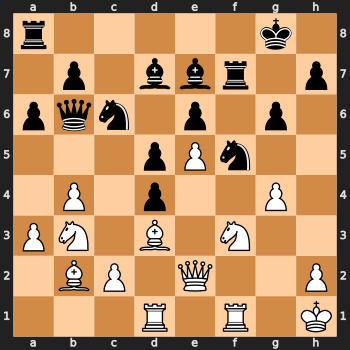

In [8]:
# From the game at: https://lichess.org/lP5hNZT7/white#34
# Puzzle: https://lichess.org/training/ZgxGl

line = "r5k1/1p1bbr1p/pqn1p1p1/3pPn2/1P1p2P1/PN1B1N2/1BP1Q2P/3R1R1K"
board = chess.Board(line)
display(chess.svg.board(board, size=350))

In [10]:
# Essence of the position
line = "*/*r*/?q*/*n*/*p*/*N*N*/?B*Q*/*"


Searching for: */*r*/?q*/*n*/*p*/*N*N*/?B*Q*/*
2 total matching documents.
scoreDoc doc=287827 score=1.0 shardIndex=-1
Matched line: r5k1/1p1bbr1p/pqn1p1p1/3pPnP1/1P1p4/PN1B1N1P/1BP1Q3/R3K1R1 b Q - 1 17


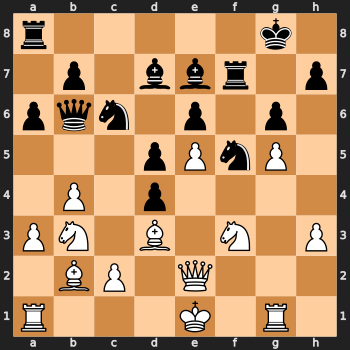

Position: https://lichess.org/pjyd8BHT#34
Found 4 other matches in the game.
scoreDoc doc=368725 score=1.0 shardIndex=-1
Matched line: 3r2k1/1b1rbppn/pq2p2p/np2P3/2pP1P2/P1P1NNPP/1B2Q1BK/R2R4 b - - 2 24


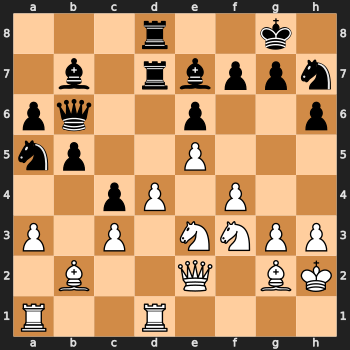

Position: https://lichess.org/xbuWzfvR#48
Found 0 other matches in the game.


In [12]:
INDEX_DIR = "2MGames.index"
import sys, os, lucene
import chess.svg
import fnmatch

from java.nio.file import Paths
from org.apache.lucene.analysis.standard import StandardAnalyzer
from org.apache.lucene.index import DirectoryReader
from org.apache.lucene.queryparser.classic import QueryParser, MultiFieldQueryParser, QueryParserBase
from org.apache.lucene.search import IndexSearcher, WildcardQuery
from org.apache.lucene.store import NIOFSDirectory
from org.apache.lucene.index import Term
from org.apache.lucene.index import Term
from org.apache.lucene.search import WildcardQuery

def run(searcher, analyzer, command):
    print ("Searching for:", command)
    term = Term("contents", command)
    query = WildcardQuery(term)
    scoreDocs = searcher.search(query, 1000).scoreDocs
    print ("%s total matching documents." % len(scoreDocs))

    for scoreDoc in scoreDocs[:5]:
        print ("scoreDoc", scoreDoc)
        doc = searcher.doc(scoreDoc.doc)
        contents = doc.get("contents")
        
        count = 0
        line_count = 0

        for line in contents.split("\n"):
            line_count += 1
            if fnmatch.fnmatch(line, command + "*"):
                if count == 0:
                    print("Matched line:", line)
                    board = chess.Board(line)
                    display(chess.svg.board(board, size=350))
                    print(f"Position: https://lichess.org/{doc.get('name').split('.')[0]}#{line_count}")
                count += 1
        
        print(f"Found {count-1} other matches in the game.")
                
base_dir = "/Users/tobiaswilfert/Documents/University/IR/chess-db"
directory = NIOFSDirectory(Paths.get(os.path.join(base_dir, INDEX_DIR)))
searcher = IndexSearcher(DirectoryReader.open(directory))
analyzer = LimitTokenCountAnalyzer(WhitespaceAnalyzer(), 1048576)
run(searcher, analyzer, command=line)
del searcher

## Observation
The first positions is shockingly similar to the position we where looking for. But the best move is different due to the fact that the white king can be checked by the black bishop moving to the B4 square.

## Problem
Due to the fact that the FEN notation already does run length encoding we can't query a board position where a piece is at a specific position without specifying the entire row. This is due to the row notation being variable length depending on the number of empty squares. This also leads to positions that are not that different to have a large edit distance. To avoid this we will encode the games in our on variation of the FEN notation that encodes the spaces on the board explicitly and hence is fixed length. This should help with looking up specific board positions and might even allow us to use the fuzzy queries to find similar positions.

## Playing to see if we can get an interactive interface

In [1]:
from IPython.display import HTML, display
from time import sleep

display(HTML("""
<link rel="stylesheet"
      href="https://unpkg.com/@chrisoakman/chessboardjs@1.0.0/dist/chessboard-1.0.0.min.css"
      integrity="sha384-q94+BZtLrkL1/ohfjR8c6L+A6qzNH9R2hBLwyoAfu3i/WCvQjzL2RQJ3uNHDISdU"
      crossorigin="anonymous">
      
<script src="https://code.jquery.com/jquery-3.5.1.min.js"
        integrity="sha384-ZvpUoO/+PpLXR1lu4jmpXWu80pZlYUAfxl5NsBMWOEPSjUn/6Z/hRTt8+pR6L4N2"
        crossorigin="anonymous"></script>

<script src="https://unpkg.com/@chrisoakman/chessboardjs@1.0.0/dist/chessboard-1.0.0.min.js"
        integrity="sha384-8Vi8VHwn3vjQ9eUHUxex3JSN/NFqUg3QbPyX8kWyb93+8AC/pPWTzj+nHtbC5bxD"
        crossorigin="anonymous"></script>

  
<div id="board" style="width: 400px"></div>
<button id="startBtn">Start Position</button>
<button id="clearBtn">Clear Board</button>
<div>FEN:</div>
<div id="fenOut"></div>

<script>
  var board = Chessboard('board', {
  draggable: true,
  dropOffBoard: 'trash',
  sparePieces: true,
  onChange: outputFen
})

function outputFen (_, newPos) {
        $('#fenOut').text(Chessboard.objToFen(newPos))
}

$('#startBtn').on('click', board.start)
$('#clearBtn').on('click', board.clear)
</script>
"""))

sleep(1)

## Converter to expanded FEN notation

In [2]:
def decode_fen(fen):
    decoded_fen = ""
    space_encountered = False
    
    for char in fen:
        if char == ' ':
            space_encountered = True
        elif char == '\n':
            space_encountered = False

        if not space_encountered and char.isdigit():
            decoded_fen += "-" * int(char)
        else:
            decoded_fen += char
            
    return decoded_fen

In [3]:
decode_fen("8/8/8/8/8/1K6/3R2B1/Q7")

'--------/--------/--------/--------/--------/-K------/---R--B-/Q-------'